# Fiducial model exploration

In [1]:
import cogsworth
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import gala.dynamics as gd

In [2]:
import sys
sys.path.append("../src")
import plotting

In [3]:
import h5py as h5

In [4]:
%config InlineBackend.figure_format = 'retina'

pd.options.display.max_columns = 999

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

In [92]:
gal_pops = {file_name: cogsworth.pop.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/{file_name}.h5", parts=[])
        for file_name in ["fiducial", "alpha-vir-0.1", "alpha-vir-10.0", "r-0.1", "r-1.0", "r-10.0", "r-100.0"]}

In [93]:
for p in gal_pops:
    plotting.set_sn_subpop_masks(gal_pops[p])
    f = np.load(f"/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-{p}.npz")
    gal_pops[p].primary_sn_distances, gal_pops[p].secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970
1232 17382 11243 21970


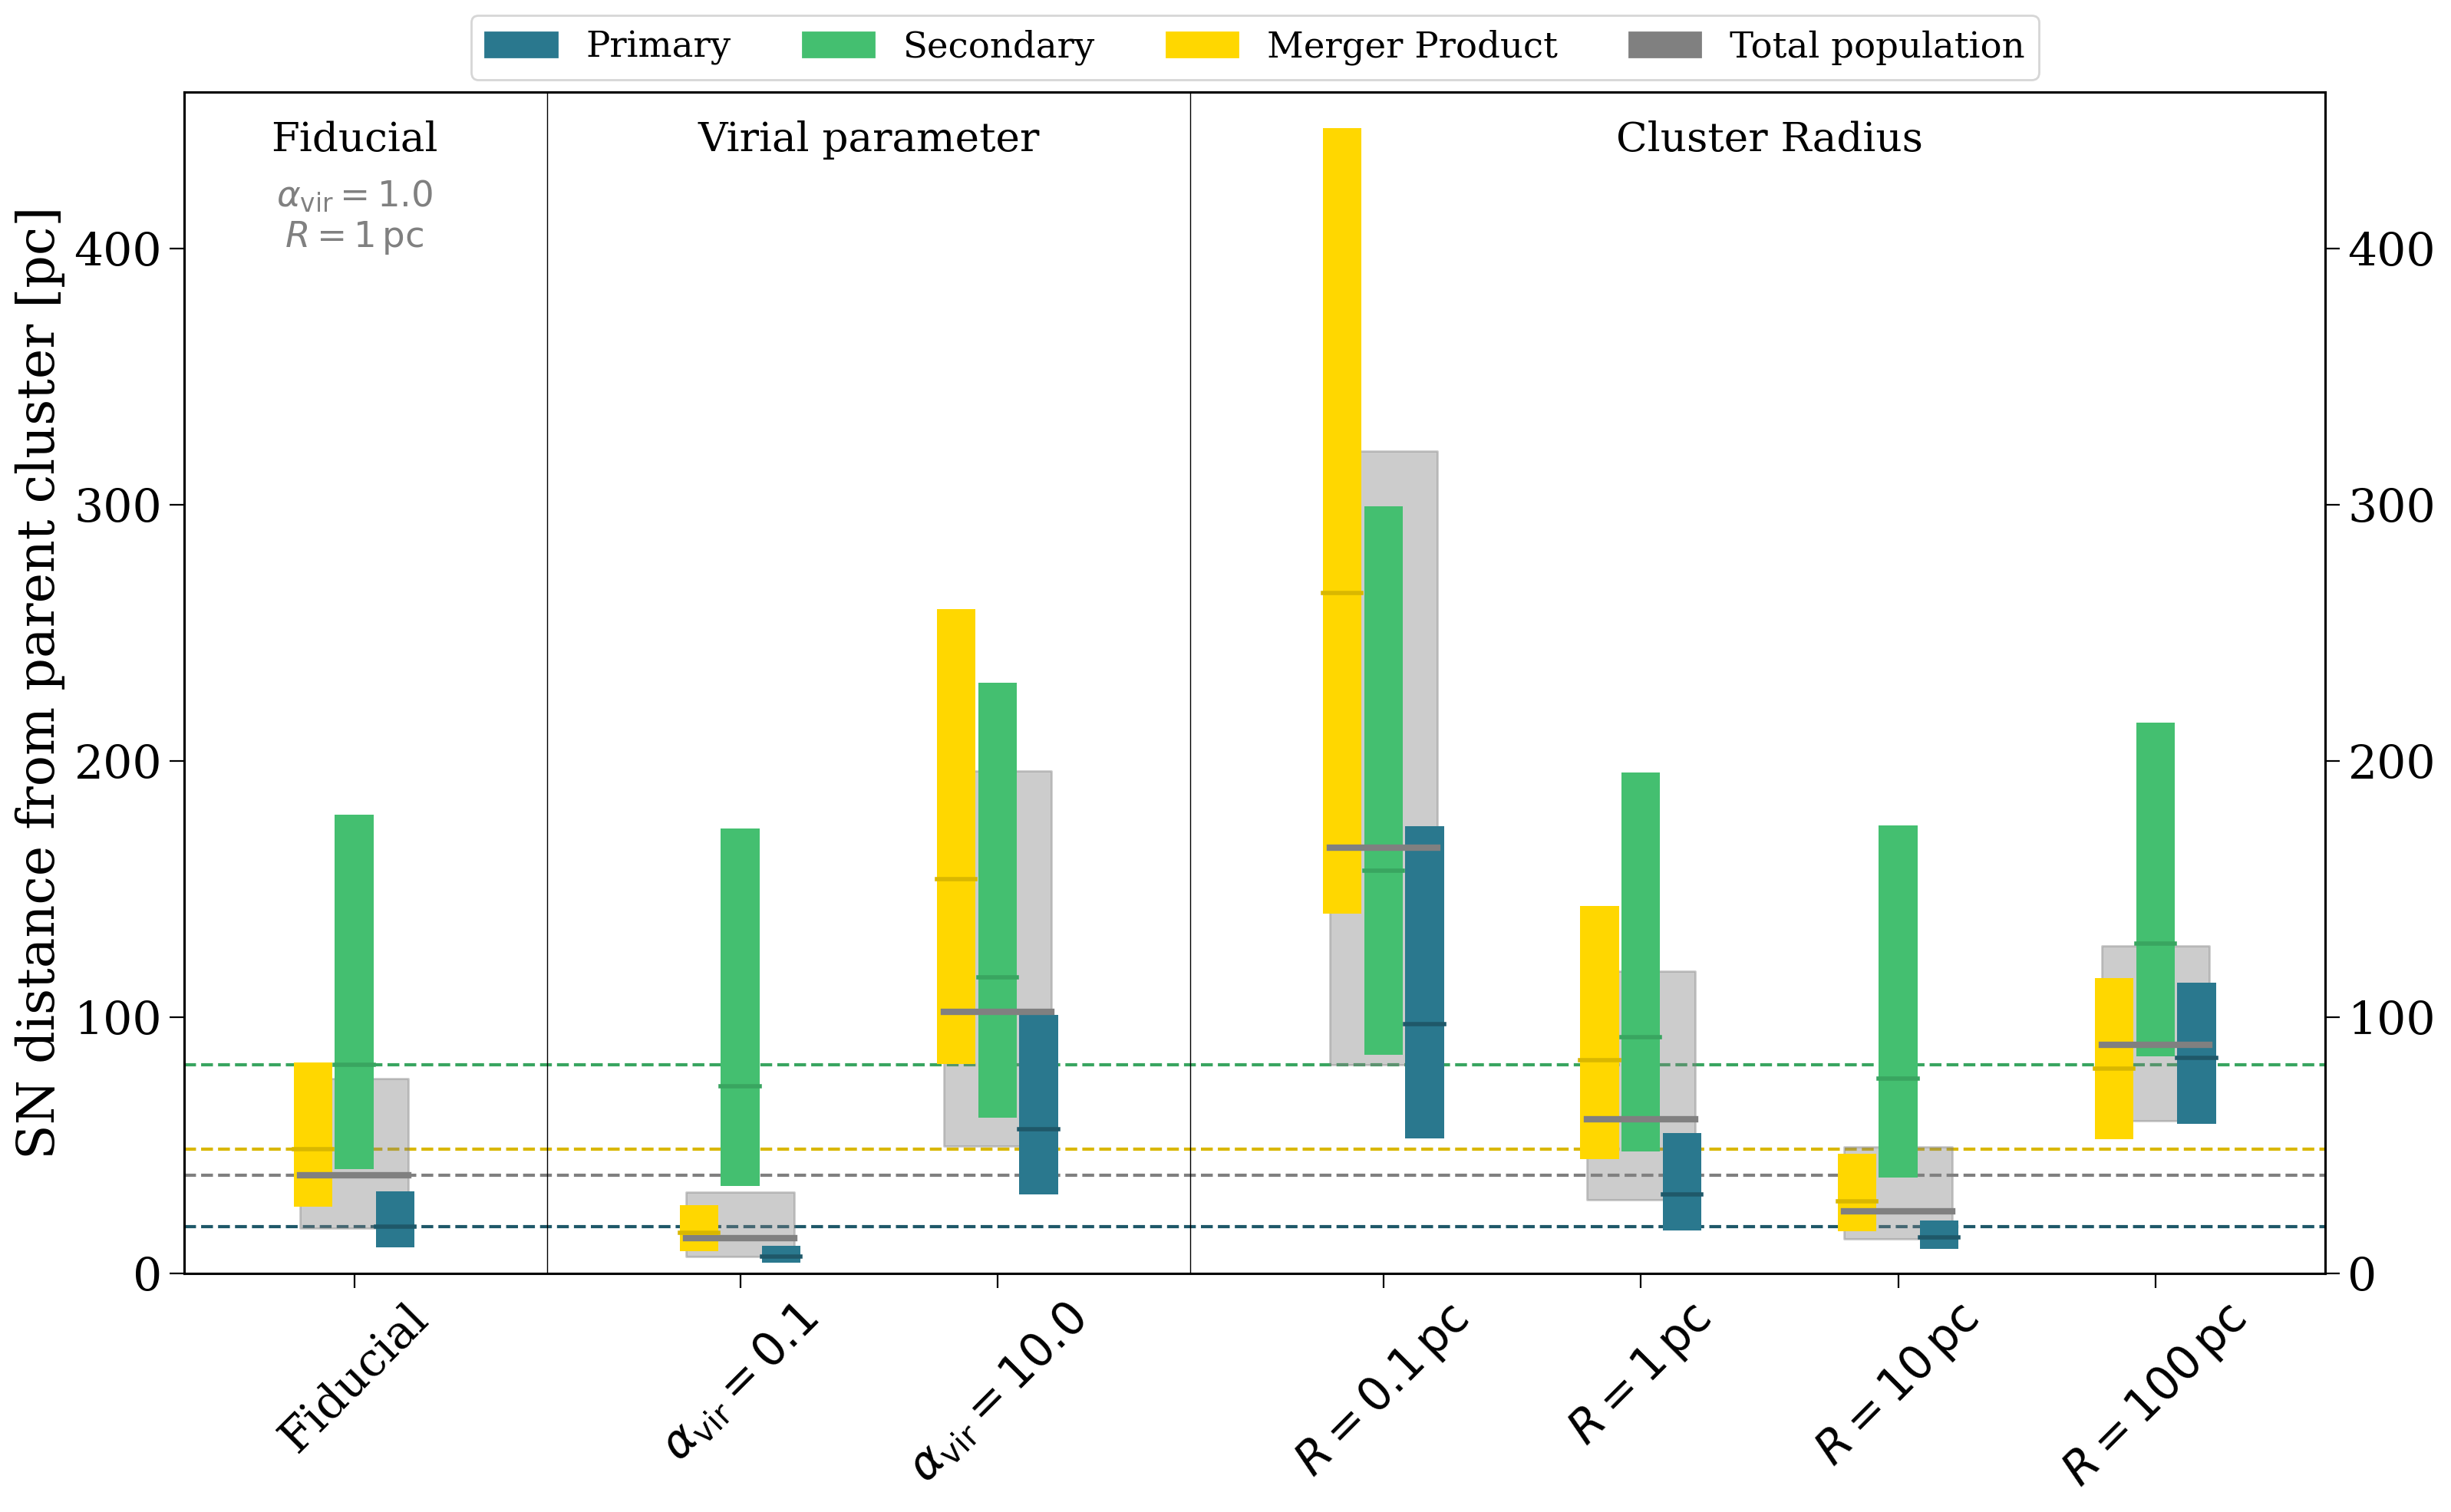

(<Figure size 1800x1000 with 2 Axes>,
 <Axes: ylabel='SN distance from parent cluster [pc]'>)

In [127]:
plotting.compare_variations(gal_pops, ["Fiducial",
                                   r"$\alpha_{\rm vir} = 0.1$", r"$\alpha_{\rm vir} = 10.0$",
                                   r"$R = 0.1 \, {\rm pc}$", r"$R = 1 \, {\rm pc}$",
                                   r"$R = 10 \, {\rm pc}$", r"$R = 100 \, {\rm pc}$"],
                        group_labels=["Fiducial", "Virial parameter", "Cluster Radius"],
                        group_start_inds=[1, 3], annotate_loc=450,
                        fiducial_settings=[r"$\alpha_{\rm vir} = 1.0$", r"$R = 1 \, {\rm pc}$"])

# Grab the data

In [7]:
p = cogsworth.pop.load("/mnt/home/twagg/ceph/pops/feedback-variations/fiducial.h5")

In [8]:
plotting.set_sn_subpop_masks(p);

1232 17382 11243 21970


In [10]:
f = np.load("/mnt/home/twagg/ceph/pops/feedback-variations/sn_positions-fiducial.npz")
p.primary_sn_distances, p.secondary_sn_distances = f["arr_0"] * u.kpc, f["arr_1"] * u.kpc

# Distances

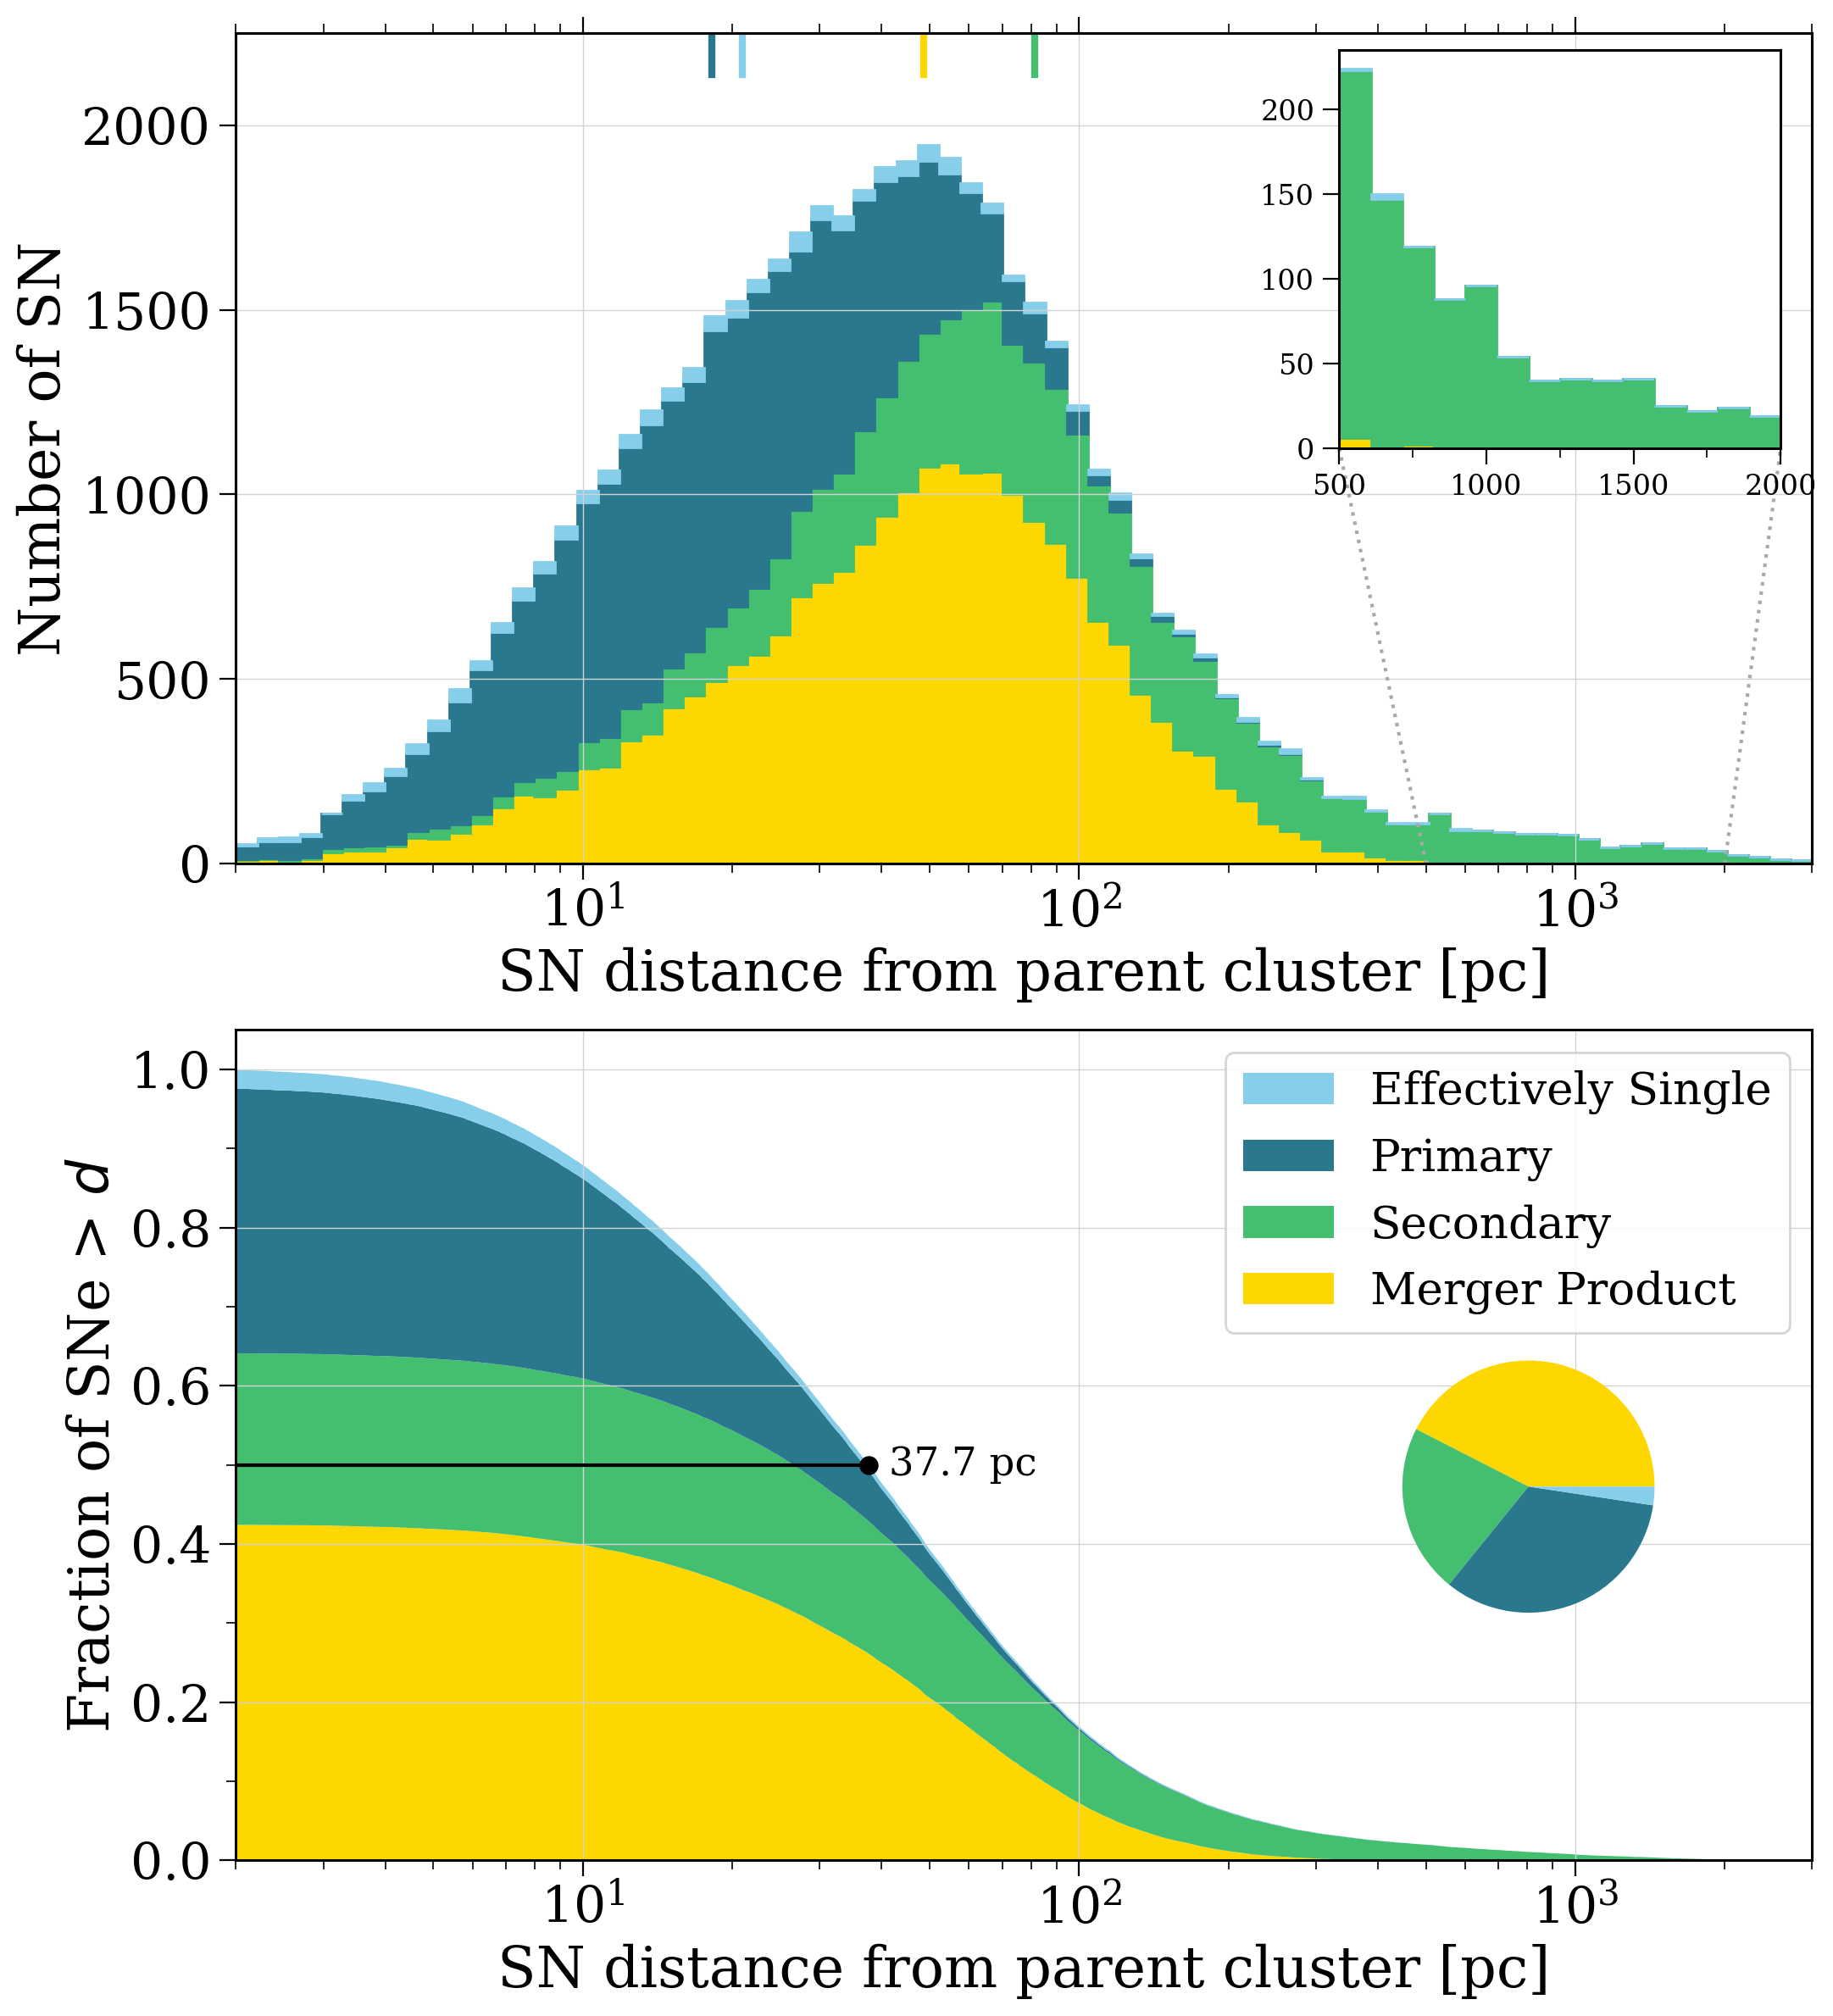

(<Figure size 1200x1400 with 3 Axes>,
 array([<Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Number of SN'>,
        <Axes: xlabel='SN distance from parent cluster [pc]', ylabel='Fraction of SNe > $d$'>],
       dtype=object))

In [13]:
plotting.sandpile(p, bins=np.geomspace(2e0, 3e3, 75), inset_n_bins=15)

# Times

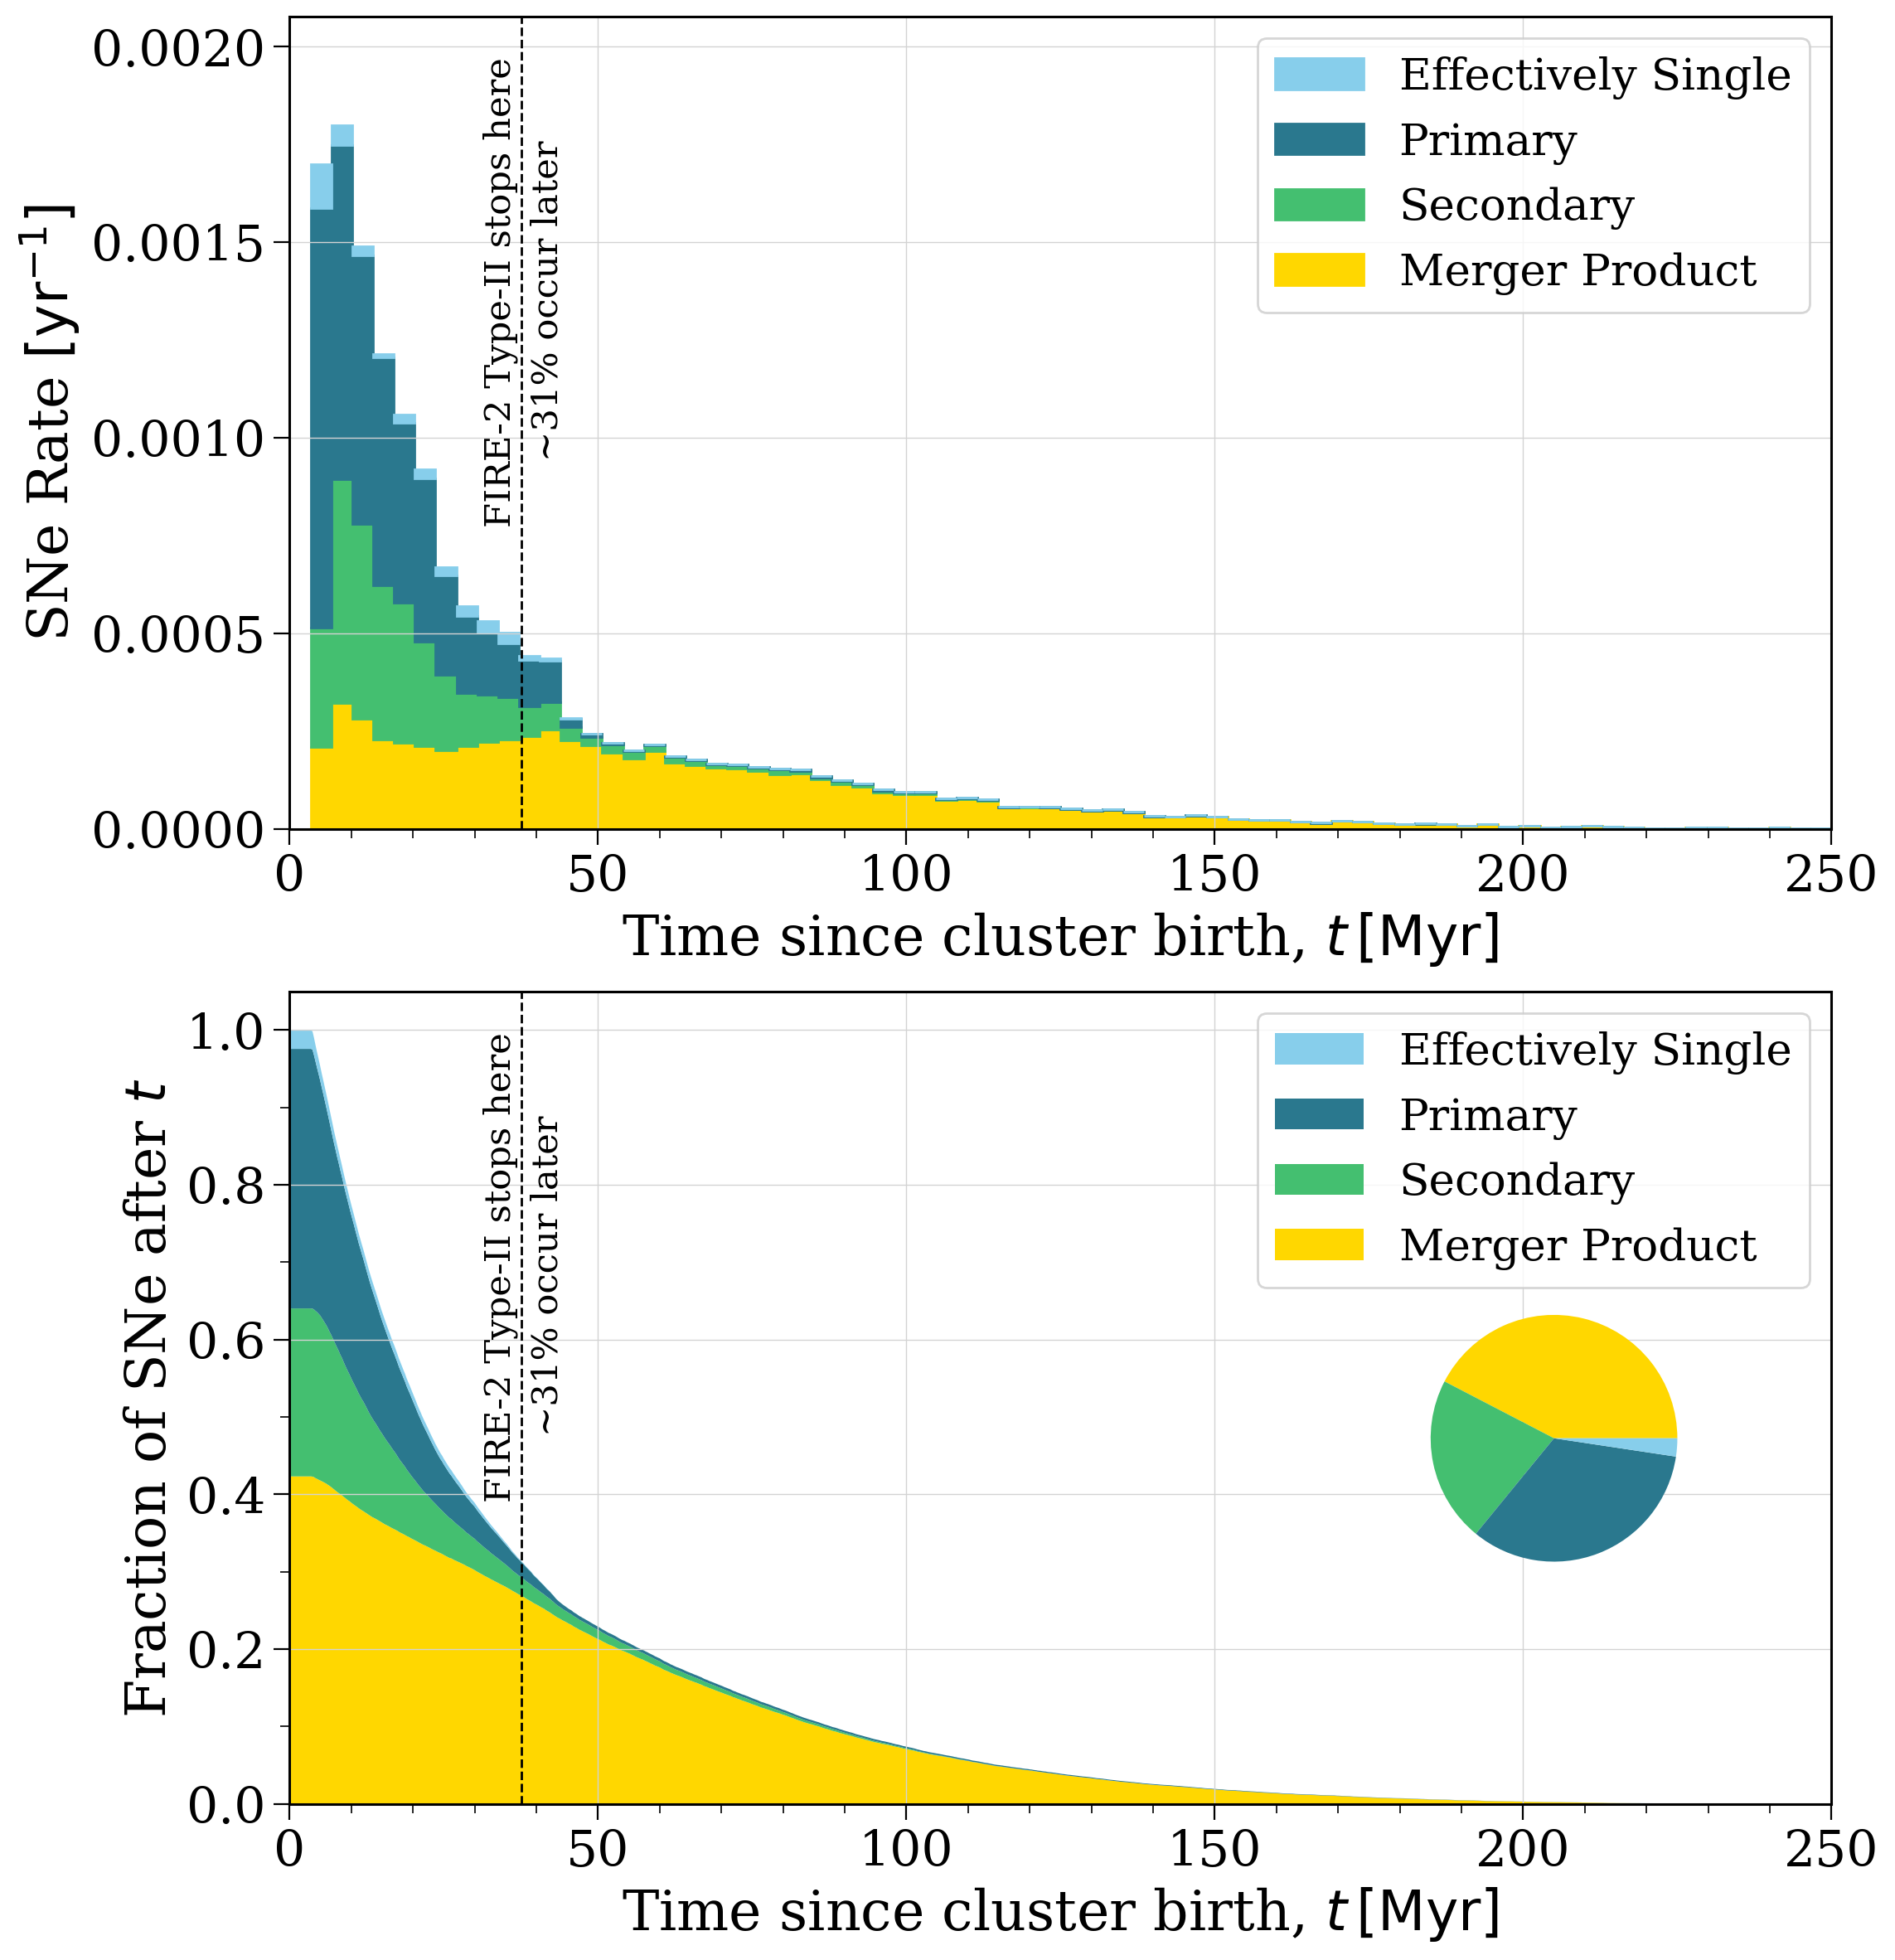

(<Figure size 1200x1400 with 2 Axes>,
 array([<Axes: xlabel='Time since cluster birth, $t \\, [\\rm Myr]$', ylabel='SNe Rate $\\rm [yr^{-1}]$'>,
        <Axes: xlabel='Time since cluster birth, $t \\, [\\rm Myr]$', ylabel='Fraction of SNe after $t$'>],
       dtype=object))

In [14]:
plotting.sandpile(p, bins=np.linspace(0, 2.5e2, 75), var="time")

# 2D distributions

In [25]:
sn_rows_1 = p.bpp[p.bpp["evol_type"] == 15]
sn_rows_2 = p.bpp[p.bpp["evol_type"] == 16]

In [26]:
sn_times_1 = sn_rows_1["tphys"]
sn_times_2 = sn_rows_2["tphys"]

In [27]:
sn_type_1 = np.repeat("primary", len(sn_times_1))
sn_type_1[p.sn_1_merger] = "merger"
sn_type_1[p.sn_1_singles] = "single"

sn_type_2 = np.repeat("secondary", len(sn_times_2))
sn_type_2[p.sn_2_merger] = "merger"

In [28]:
colours = plotting.colours.copy()
colours[1] = "#44bf70"
colours[2] = "#2a788e"

In [29]:
ro = np.random.permutation(len(sn_times_1) + len(sn_times_2))

sn_times = np.concatenate((sn_times_1, sn_times_2))[ro]
sn_dists = np.concatenate((p.primary_sn_distances, p.secondary_sn_distances)).to(u.pc)[ro]
sn_types = np.concatenate((sn_type_1, sn_type_2))[ro]
sn_colours = np.repeat("#2a788e", len(sn_types)).astype(str)
for i, t in enumerate(["merger", "secondary", "primary", "single"]):
    sn_colours[sn_types == t] = colours[i]

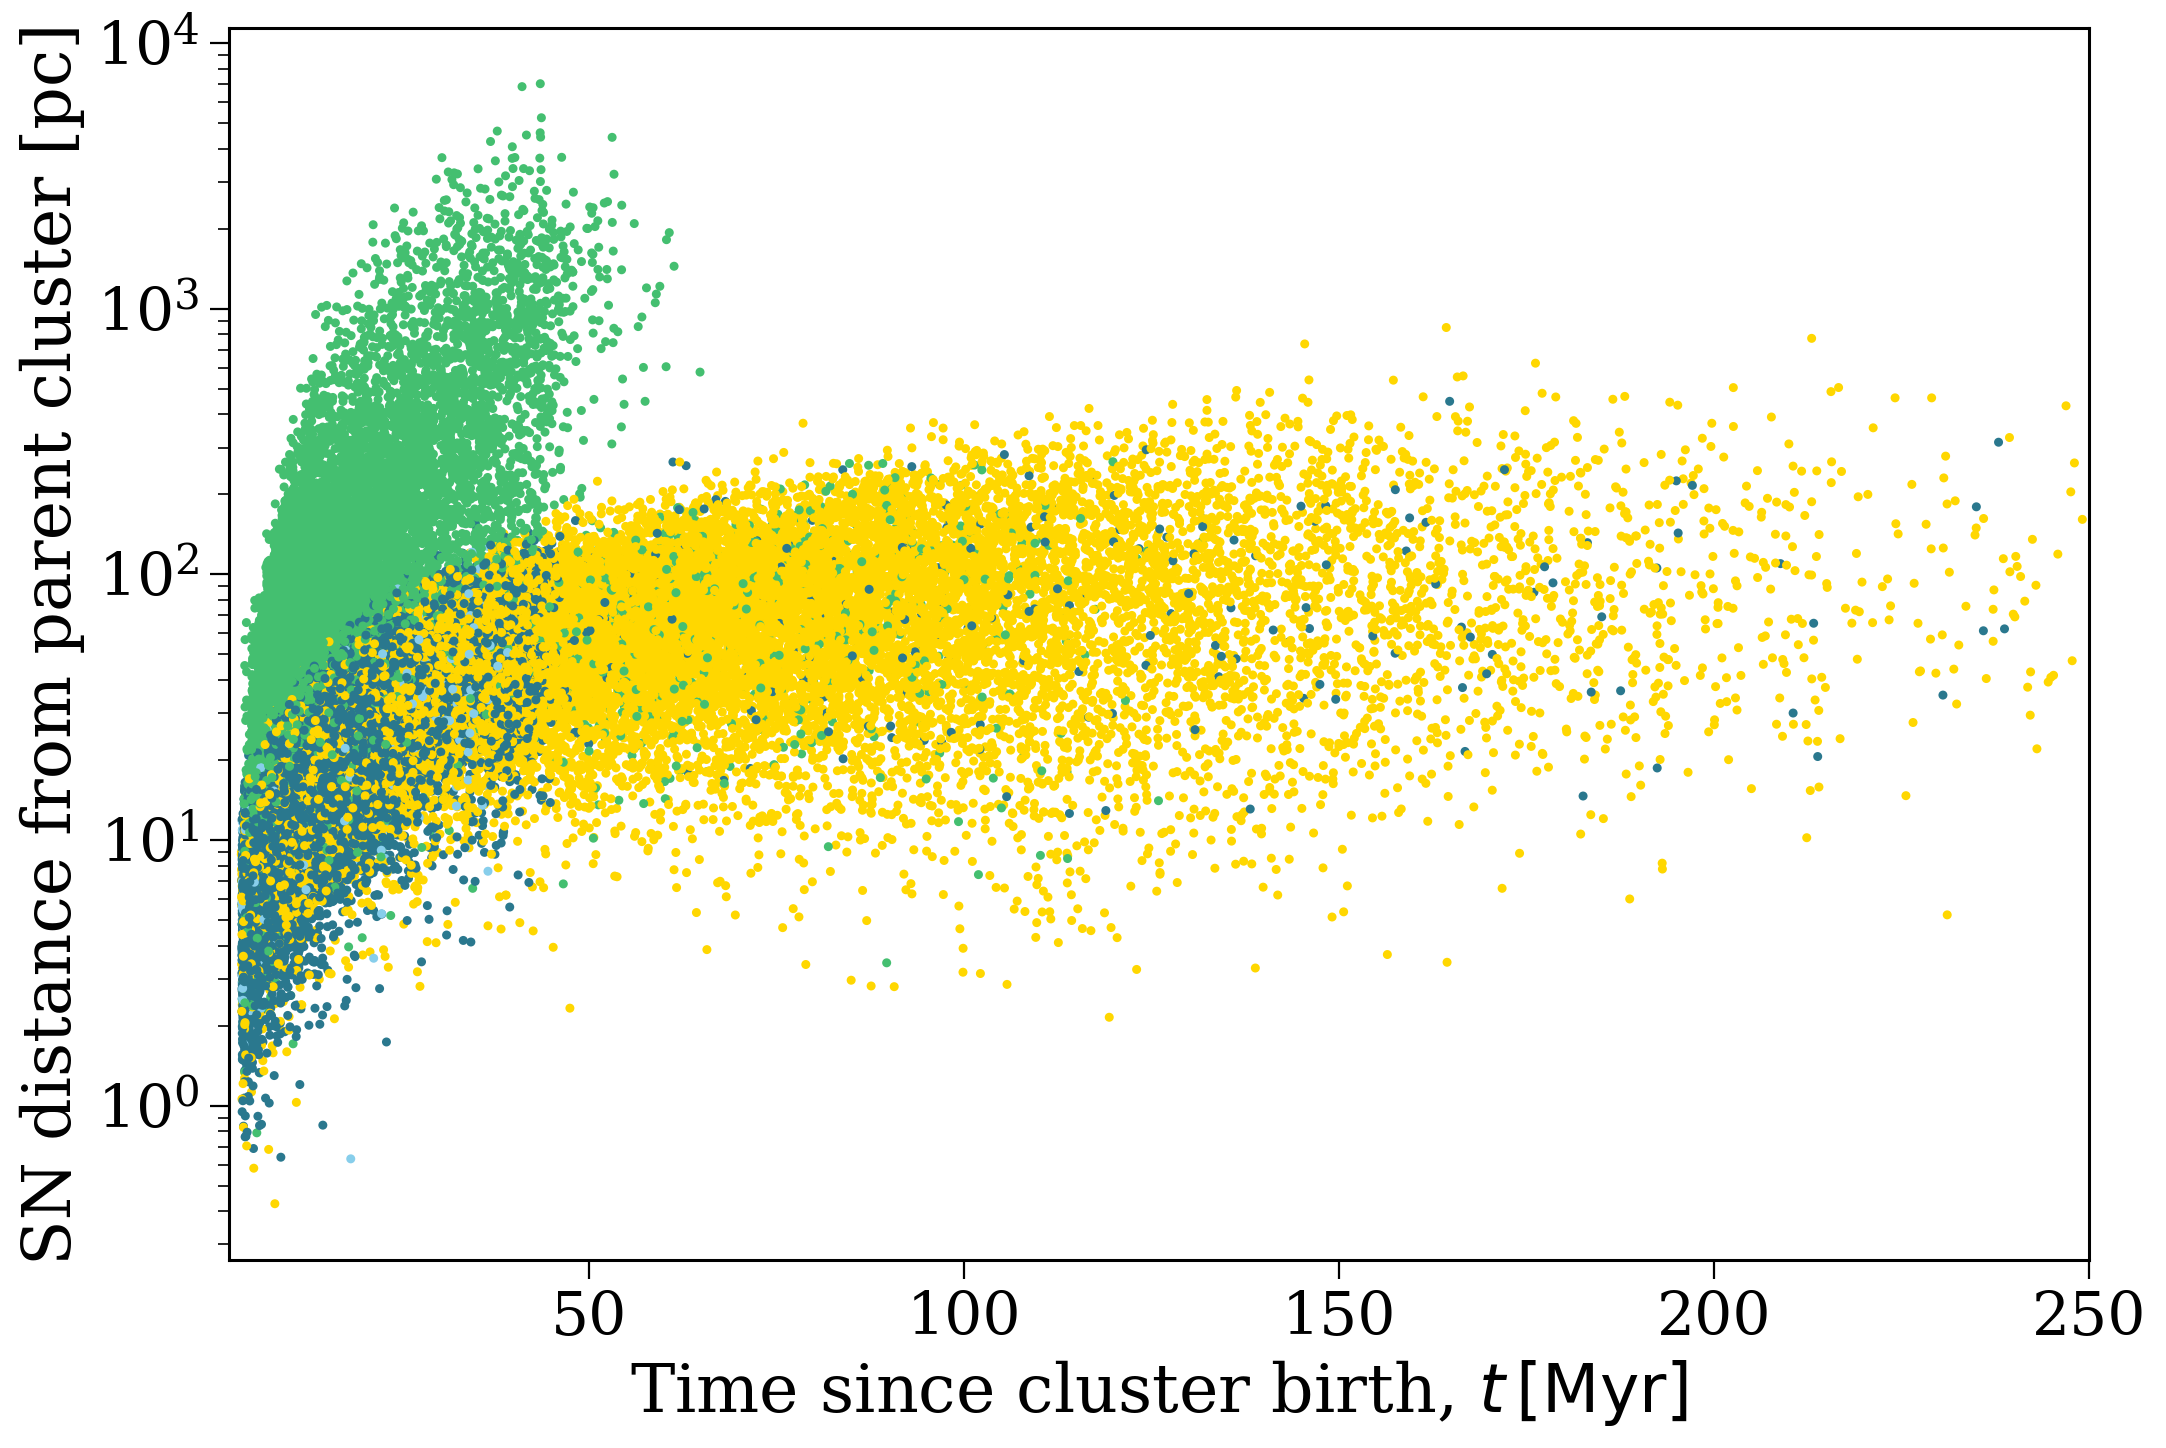

In [31]:
fig, ax = plt.subplots()

ax.scatter(sn_times, sn_dists, c=sn_colours, s=5)
ax.set(yscale="log", xlim=(2, 250), xlabel=plotting.xlabel["time"], ylabel=plotting.xlabel["distance"])

plt.show()

In [32]:
import seaborn as sns

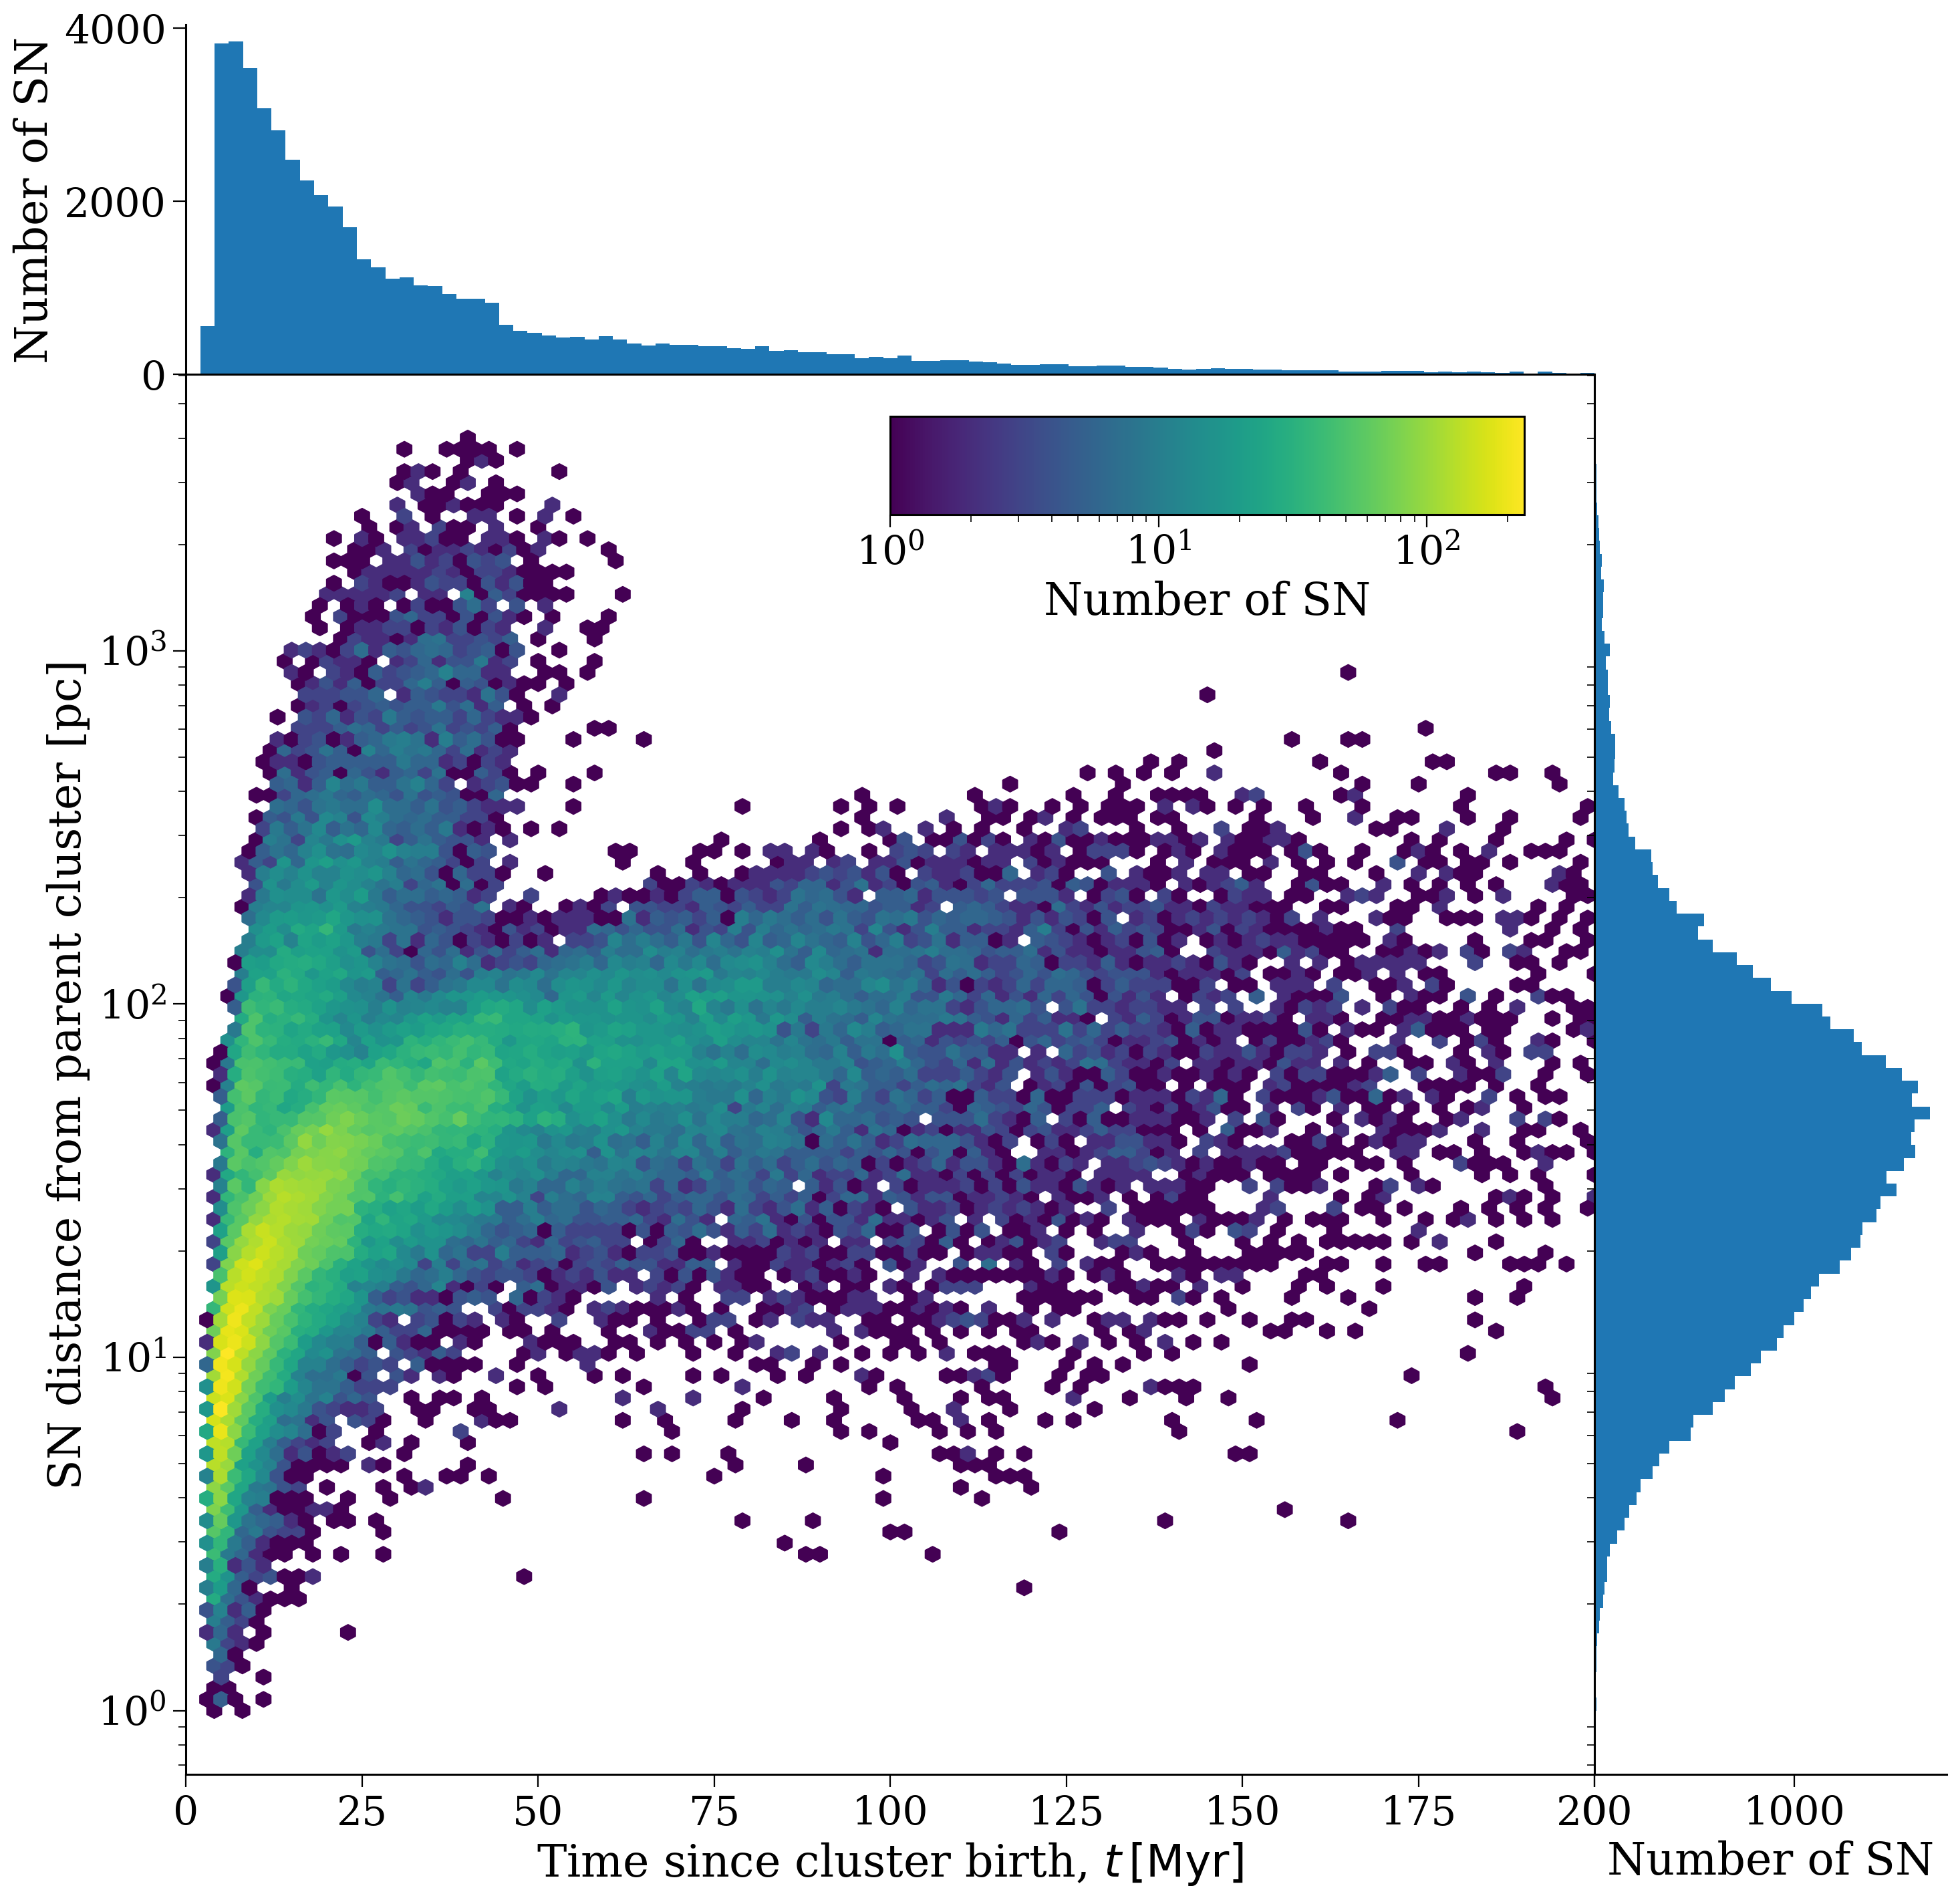

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(17, 17), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [4, 1]})

fig.subplots_adjust(wspace=0.0, hspace=0.0)

axes[0, 0].hist(sn_times, bins=np.linspace(0, 200, 100))
axes[1, 1].hist(sn_dists.value, bins=np.geomspace(1e0, 4e3, 100), orientation="horizontal")

hexbin = axes[1, 0].hexbin(sn_times, sn_dists, yscale="log", gridsize=100, bins="log", extent=(0, 200, 0, np.log10(4e3)))

inset_ax = axes[1, 0].inset_axes([0.5, 0.9, 0.45, 0.07])
fig.colorbar(hexbin, cax=inset_ax, orientation='horizontal', label="Number of SN")

axes[0, 0].set(xlim=(0, 200), ylabel=plotting.top_ylabel["distance"], xticks=[])
axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 1].axis("off")
axes[1, 0].set(yscale="log", xlim=(0, 200), xlabel=plotting.xlabel["time"], ylabel=plotting.xlabel["distance"])
axes[1, 1].set(yscale="log", xlabel=plotting.top_ylabel["distance"], yticks=[])
axes[1, 1].spines[['right', 'top']].set_visible(False)

plt.show()

gold
#44bf70
#2a788e
skyblue


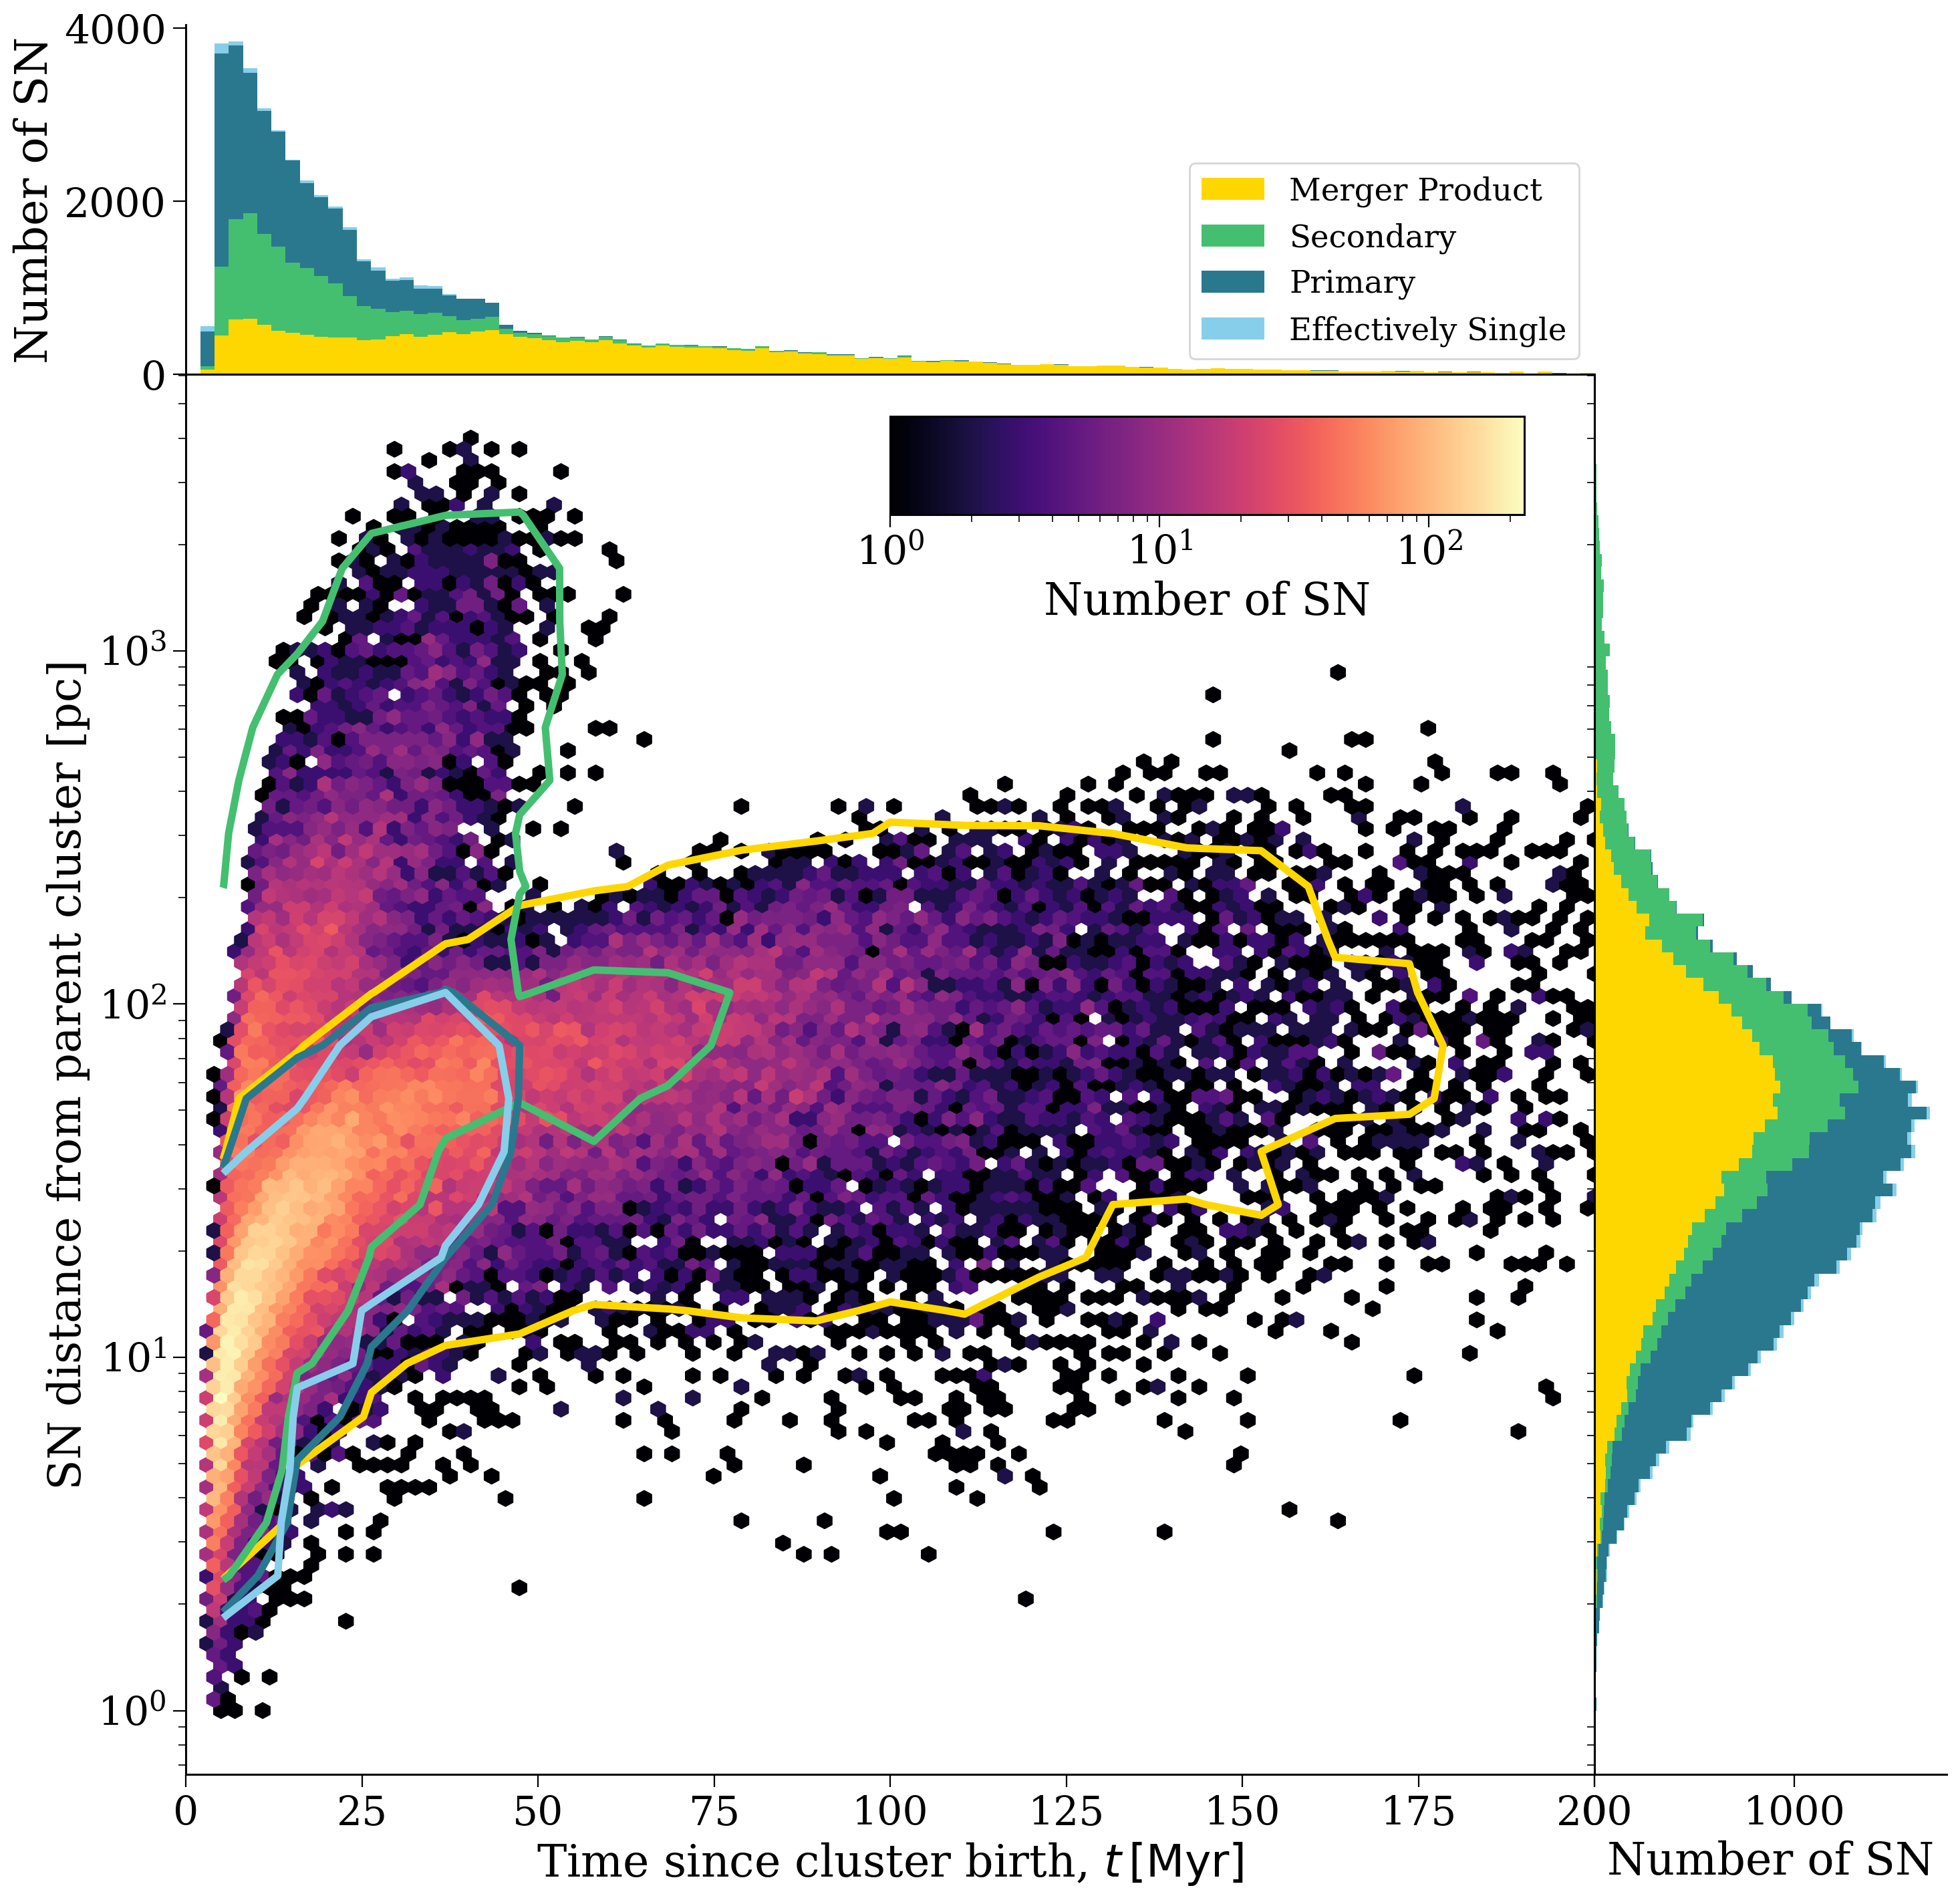

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(17, 17), gridspec_kw={'height_ratios': [1, 4], 'width_ratios': [4, 1]})

fig.subplots_adjust(wspace=0.0, hspace=0.0)

for colour in colours:
    
    print(colour)
    x = sn_times[sn_colours == colour]
    y = sn_dists.value[sn_colours == colour]
    
    xedges = np.linspace(0, 200, 20)
    yedges = np.geomspace(1, 4e3, 25)
    
    hist, xedges, yedges = np.histogram2d(x, y, bins=[xedges, yedges])    
    hist_norm = hist / np.sum(hist)

    # flatten the histogram and sort it in descending order
    hist_flat = hist_norm.flatten()
    hist_sorted = np.sort(hist_flat)[::-1]

    # compute the cumulative sum
    cumulative_sum = np.cumsum(hist_sorted)

    # find the 50% contour level
    contour_level = hist_sorted[np.searchsorted(cumulative_sum, 0.95)]

    # create meshgrid for the histogram
    xcenters = (xedges[:-1] + xedges[1:]) / 2
    ycenters = (yedges[:-1] + yedges[1:]) / 2
    X, Y = np.meshgrid(xcenters, ycenters)

    axes[1, 0].contour(X, Y, hist_norm.T, levels=[contour_level], colors=colour, linewidths=4)
    
axes[0, 0].hist([sn_times[sn_colours == colour] for colour in colours], stacked=True, bins=np.linspace(0, 200, 100), color=colours, label=plotting.labels)
axes[1, 1].hist([sn_dists.value[sn_colours == colour] for colour in colours], stacked=True, bins=np.geomspace(1e0, 4e3, 100), orientation="horizontal", color=colours)

axes[0, 0].legend(fontsize=0.7*fs, loc="lower right")

hexbin = axes[1, 0].hexbin(sn_times, sn_dists, yscale="log", gridsize=100, bins="log", extent=(3, 200, 0, np.log10(4e3)), cmap="magma")

inset_ax = axes[1, 0].inset_axes([0.5, 0.9, 0.45, 0.07])
fig.colorbar(hexbin, cax=inset_ax, orientation='horizontal', label="Number of SN")

axes[0, 0].set(xlim=(0, 200), ylabel=plotting.top_ylabel["distance"], xticks=[])
axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 1].axis("off")
axes[1, 0].set(yscale="log", xlim=(0, 200), xlabel=plotting.xlabel["time"], ylabel=plotting.xlabel["distance"])
axes[1, 1].set(yscale="log", xlabel=plotting.top_ylabel["distance"], yticks=[])
axes[1, 1].spines[['right', 'top']].set_visible(False)

plt.show()

# Fractions

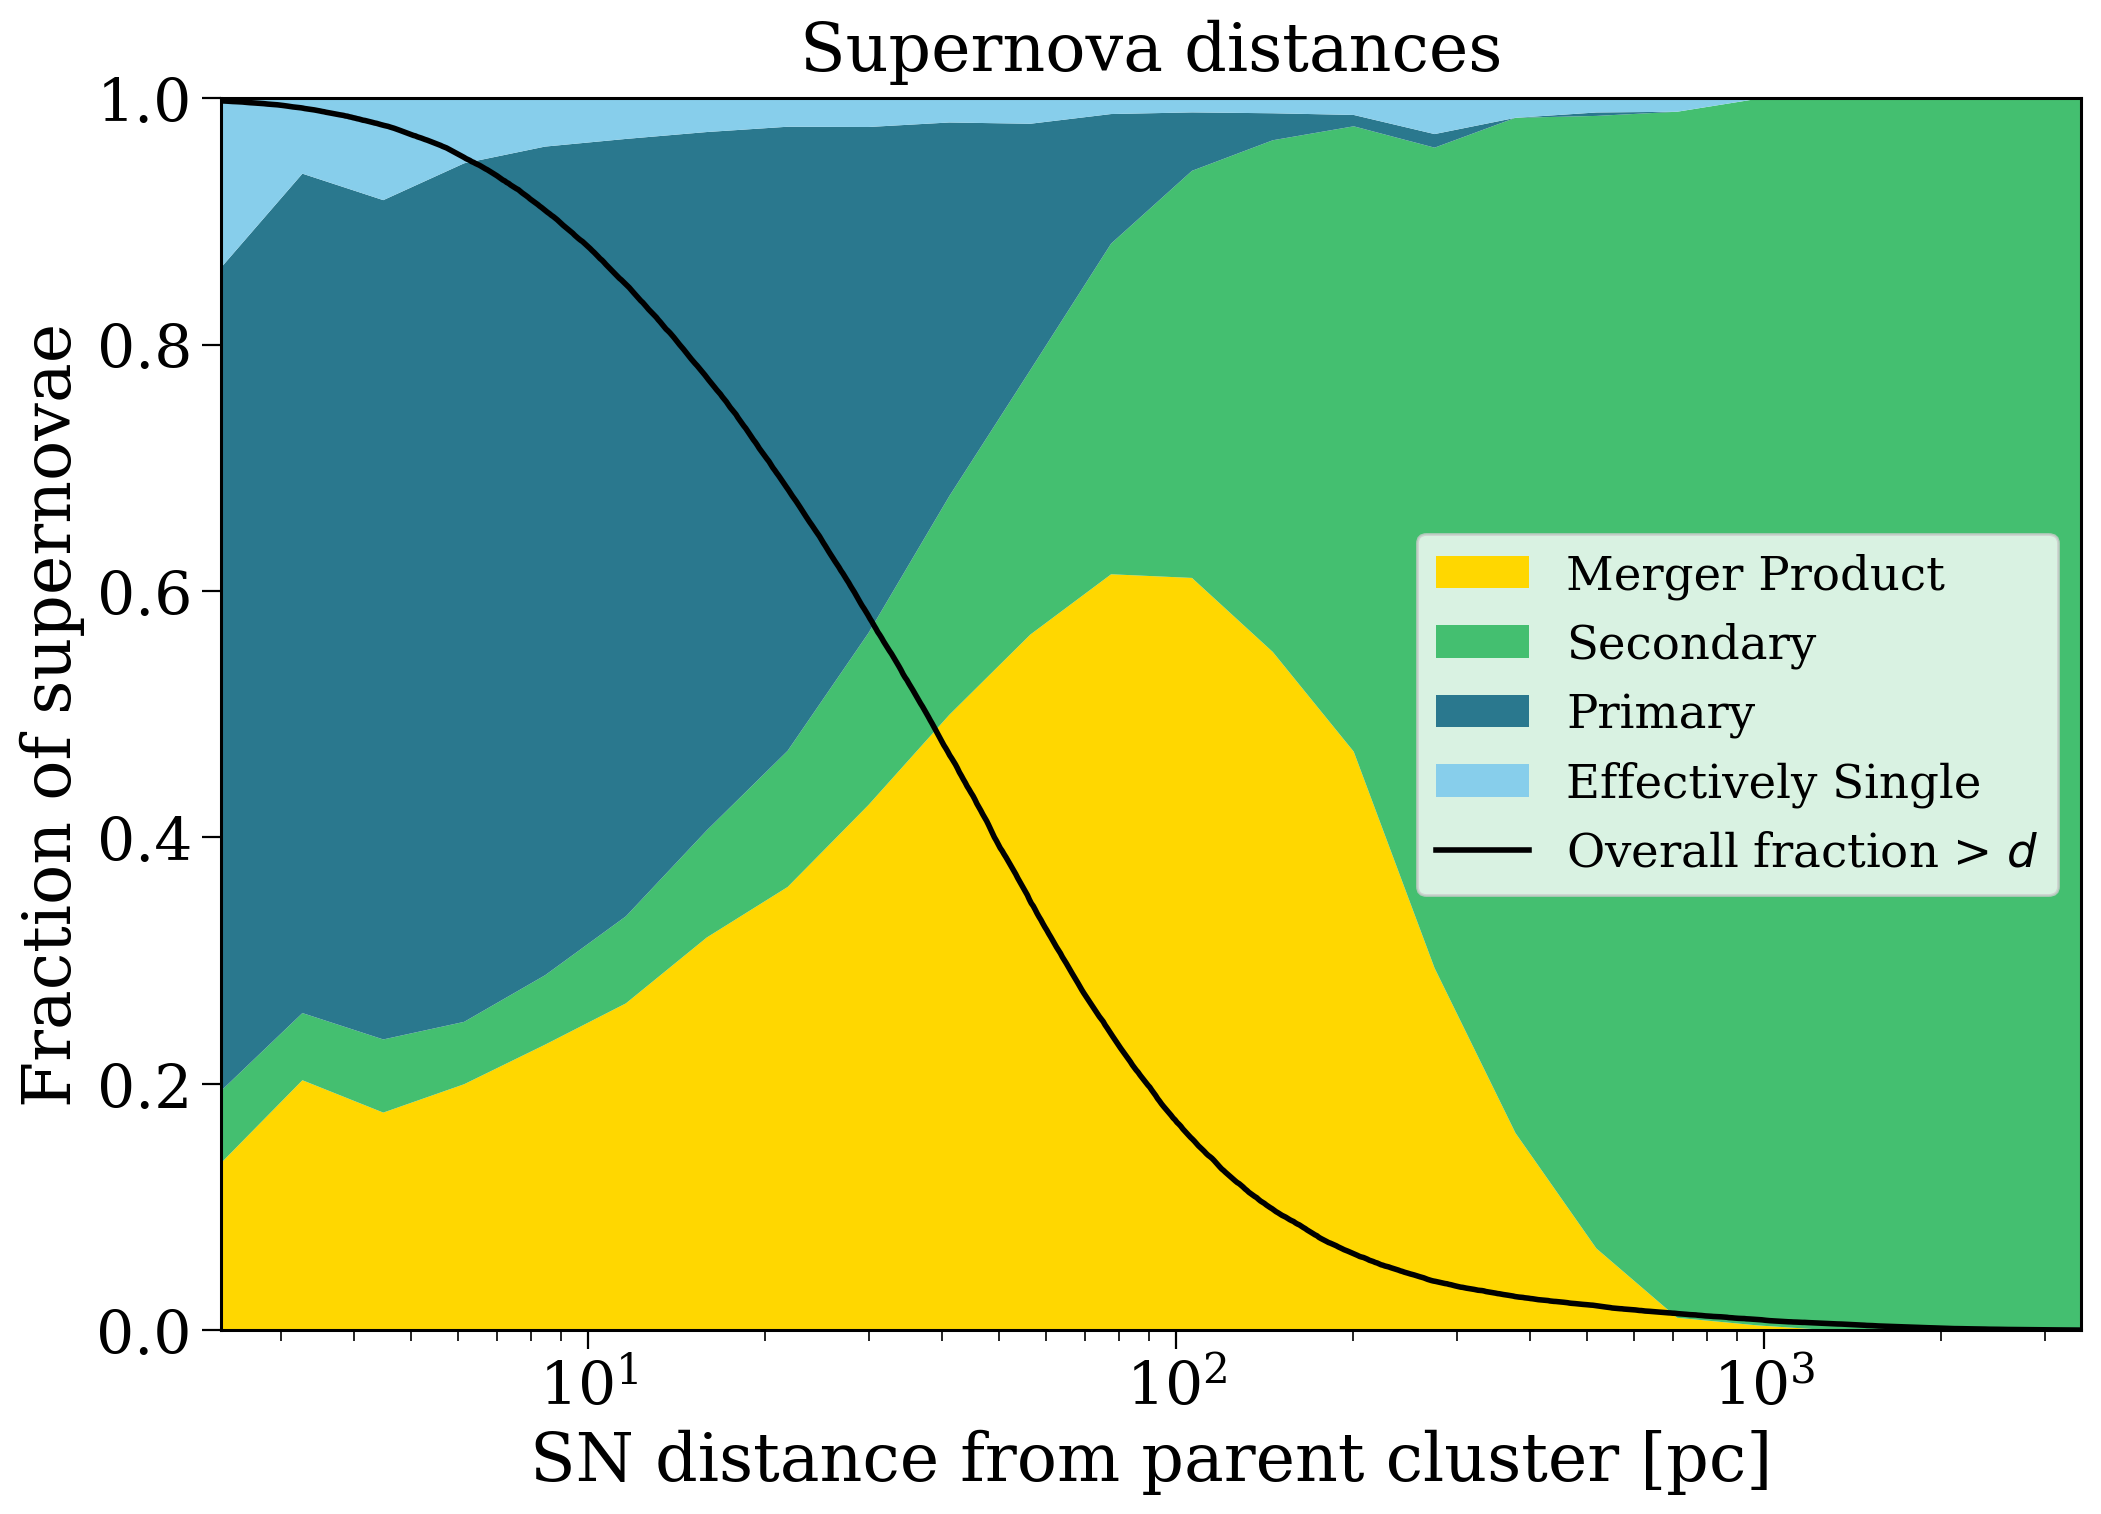

In [22]:
fig, ax = plt.subplots()

bins = np.geomspace(2e0, 4e3, 25)
bin_centres, widths = plotting.get_centres_widths(bins)

data, weights = plotting.get_data_and_weights(p, "distance")

hists = np.array([np.histogram(d, weights=w, bins=bins)[0].astype(float) for d, w in zip(data, weights)])
norm_hists = hists / hists.sum(axis=0)

bottom = np.zeros(hists.shape[1])
for h, c, l in zip(norm_hists, plotting.colours, plotting.labels):
    ax.fill_between(x=bin_centres, y1=bottom, y2=h + bottom, color=c, label=l, lw=0)
    bottom += h
    
detail_bins = np.geomspace(bins[0], bins[-1], 1000)
detail_bin_centres, _ = plotting.get_centres_widths(detail_bins)

hists = np.array([np.histogram(d, bins=detail_bins)[0].astype(float) for d in data])
chist = np.sum([np.sum(h) - np.cumsum(h) for h in hists], axis=0)
chist /= chist[0]

ax.plot(detail_bin_centres, chist, color="black", lw=2, label=r"Overall fraction > $d$")
    
ax.set(xscale="log", xlim=bin_centres[[0, -1]], ylim=(0, 1),
       xlabel=plotting.xlabel["distance"], ylabel="Fraction of supernovae")
ax.legend(loc="center right", fontsize=0.7*fs)
ax.set_title("Supernova distances", fontsize=fs, pad=10)
plt.show()

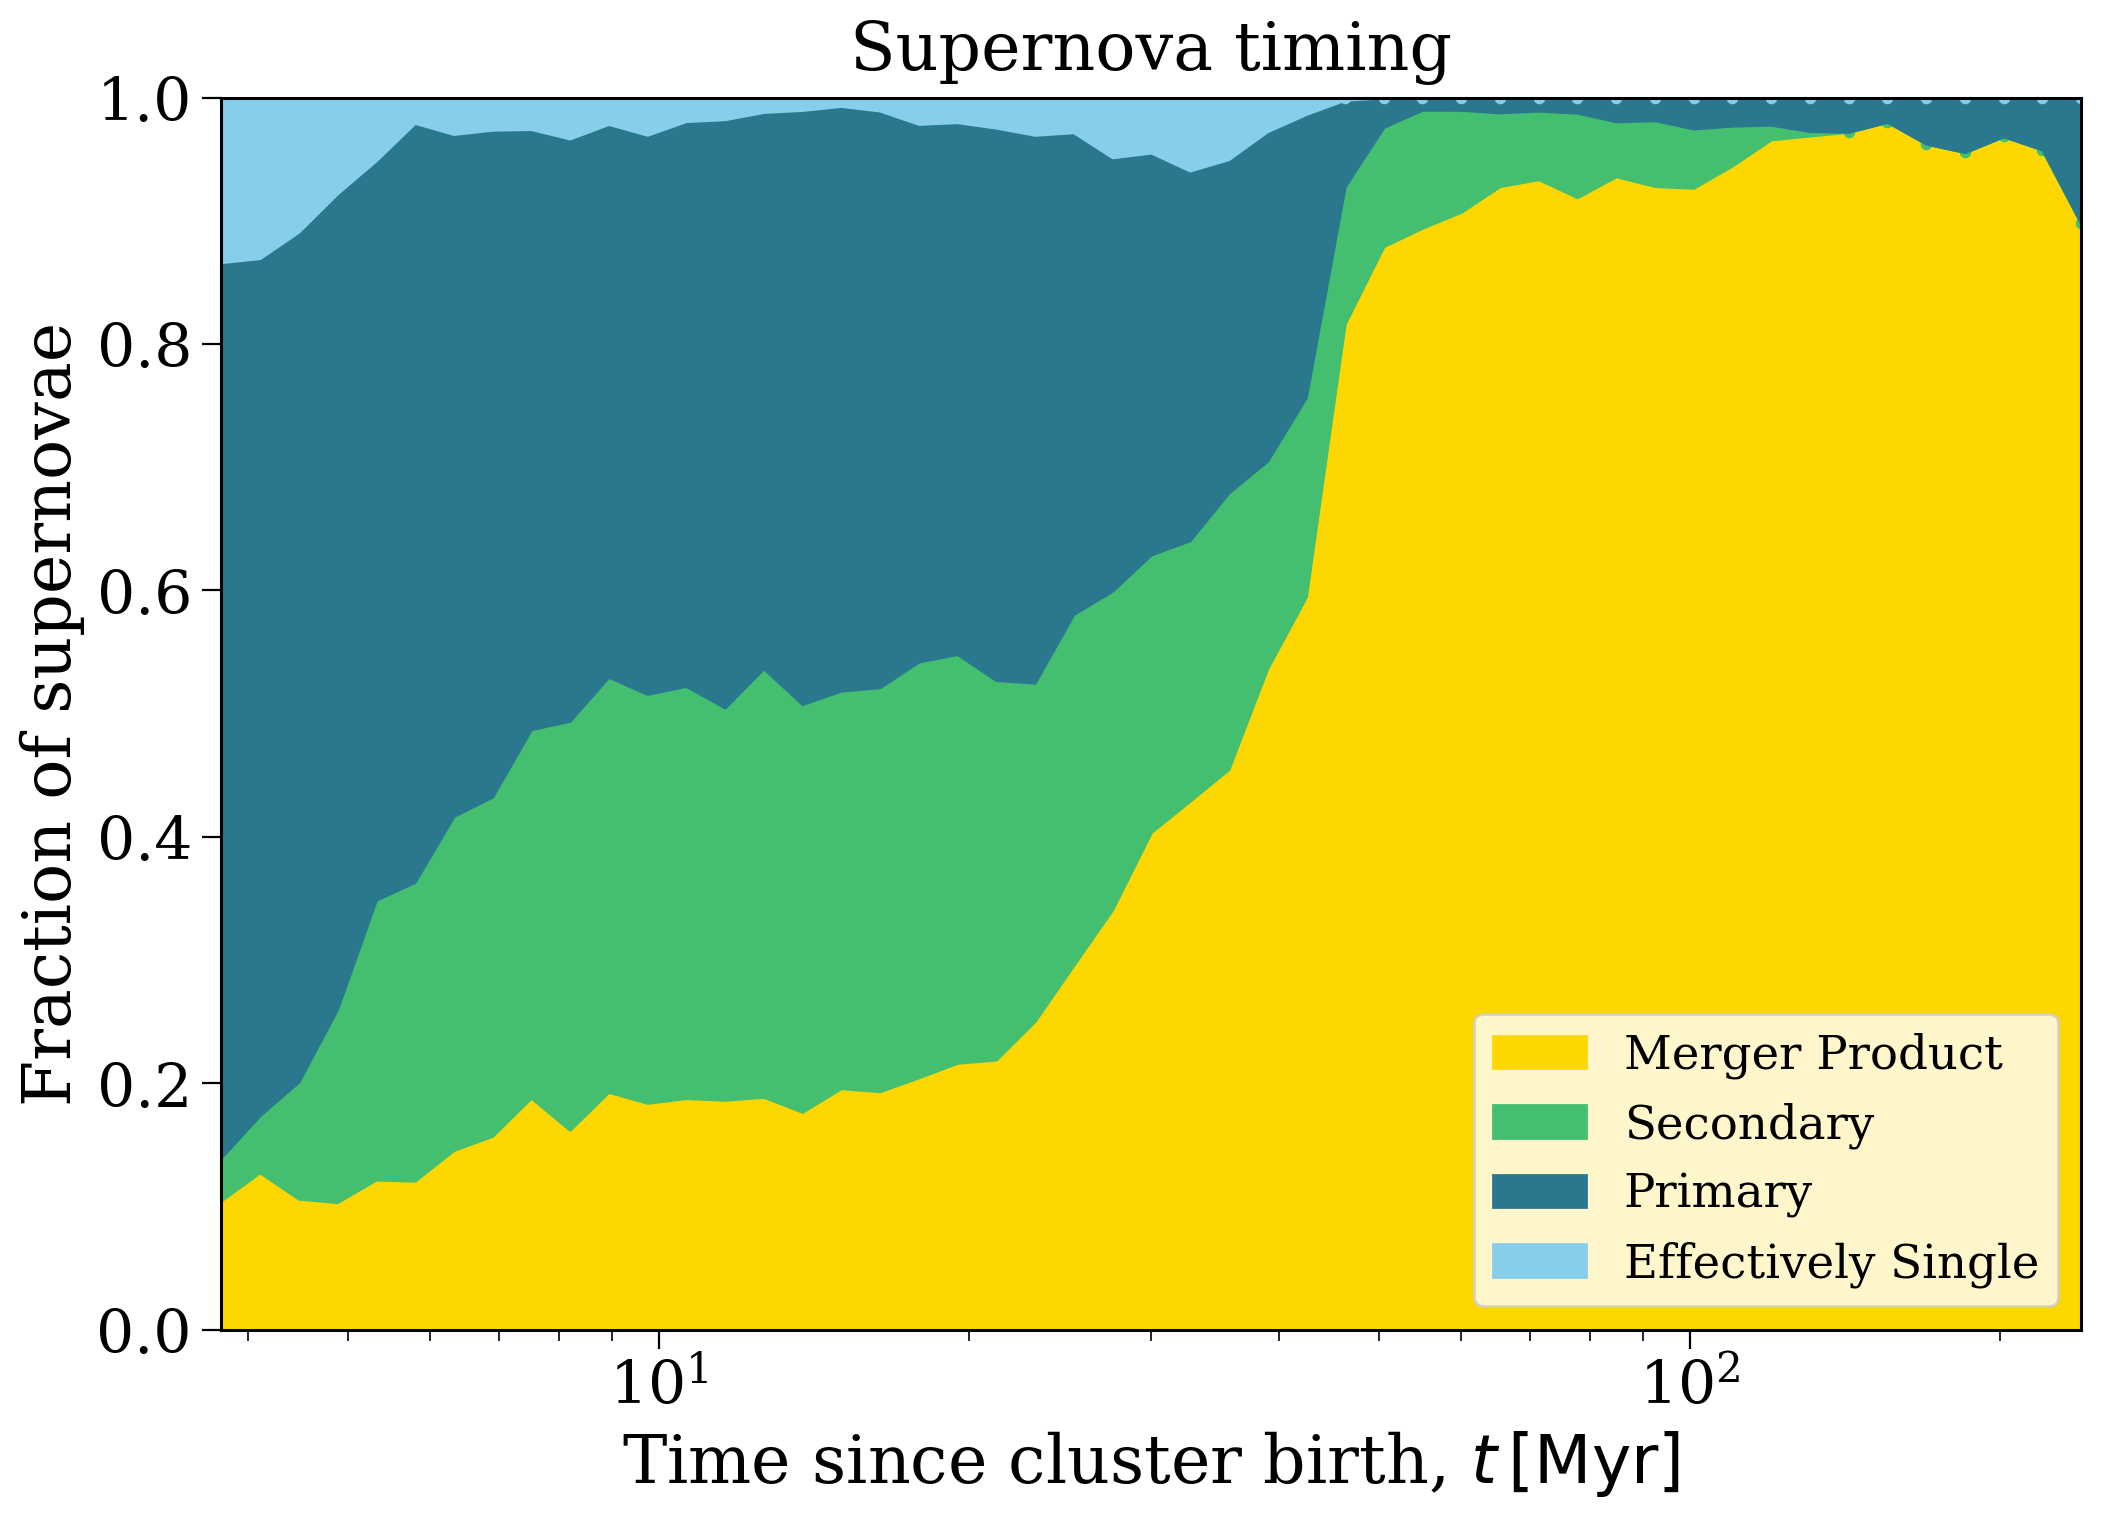

In [24]:
fig, ax = plt.subplots()

bins = np.geomspace(3.6, 250, 50)
bin_centres, widths = plotting.get_centres_widths(bins)

data, weights = plotting.get_data_and_weights(p, "time", widths)

hists = np.array([np.histogram(d, weights=w, bins=bins)[0].astype(float) for d, w in zip(data, weights)])
norm_hists = hists / hists.sum(axis=0)

bottom = np.zeros(hists.shape[1])
for h, c, l in zip(norm_hists, plotting.colours, plotting.labels):
    ax.fill_between(x=bin_centres, y1=bottom, y2=h + bottom, color=c, label=l, lw=1)
    ax.scatter(bin_centres, h + bottom, color=c, marker="o", s=10)
    bottom += h
ax.set(xscale="log", xlim=bin_centres[[0, -1]], ylim=(0, 1),
       xlabel=plotting.xlabel["time"], ylabel="Fraction of supernovae")
ax.set_title("Supernova timing", fontsize=fs, pad=10)
ax.legend(loc="lower right", fontsize=0.7*fs)
plt.show()

# Effectively single stuff

In [15]:
no_rlof = p[p.bin_nums[~np.isin(p.bin_nums, p.bpp[(p.bpp["evol_type"] >= 3) & (p.bpp["evol_type"] <= 8)]["bin_num"].unique())]]

In [16]:
def get_relative_mass_gain(p, which_star="mass_1"):
    mass_change = p.bpp.groupby("bin_num")[which_star].diff().fillna(0.0)
    mass_change[mass_change < 0] = 0
    relative_mass_gain = mass_change.groupby(mass_change.index).sum() / p.initC[which_star]
    return relative_mass_gain * 100

(array([1.2329e+04, 2.6100e+02, 1.3300e+02, 7.4000e+01, 7.0000e+01,
        3.3000e+01, 2.2000e+01, 8.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([0.        , 0.17499994, 0.34999989, 0.52499983, 0.69999977,
        0.87499972, 1.04999966, 1.2249996 , 1.39999955, 1.57499949,
        1.74999943]),
 <BarContainer object of 10 artists>)

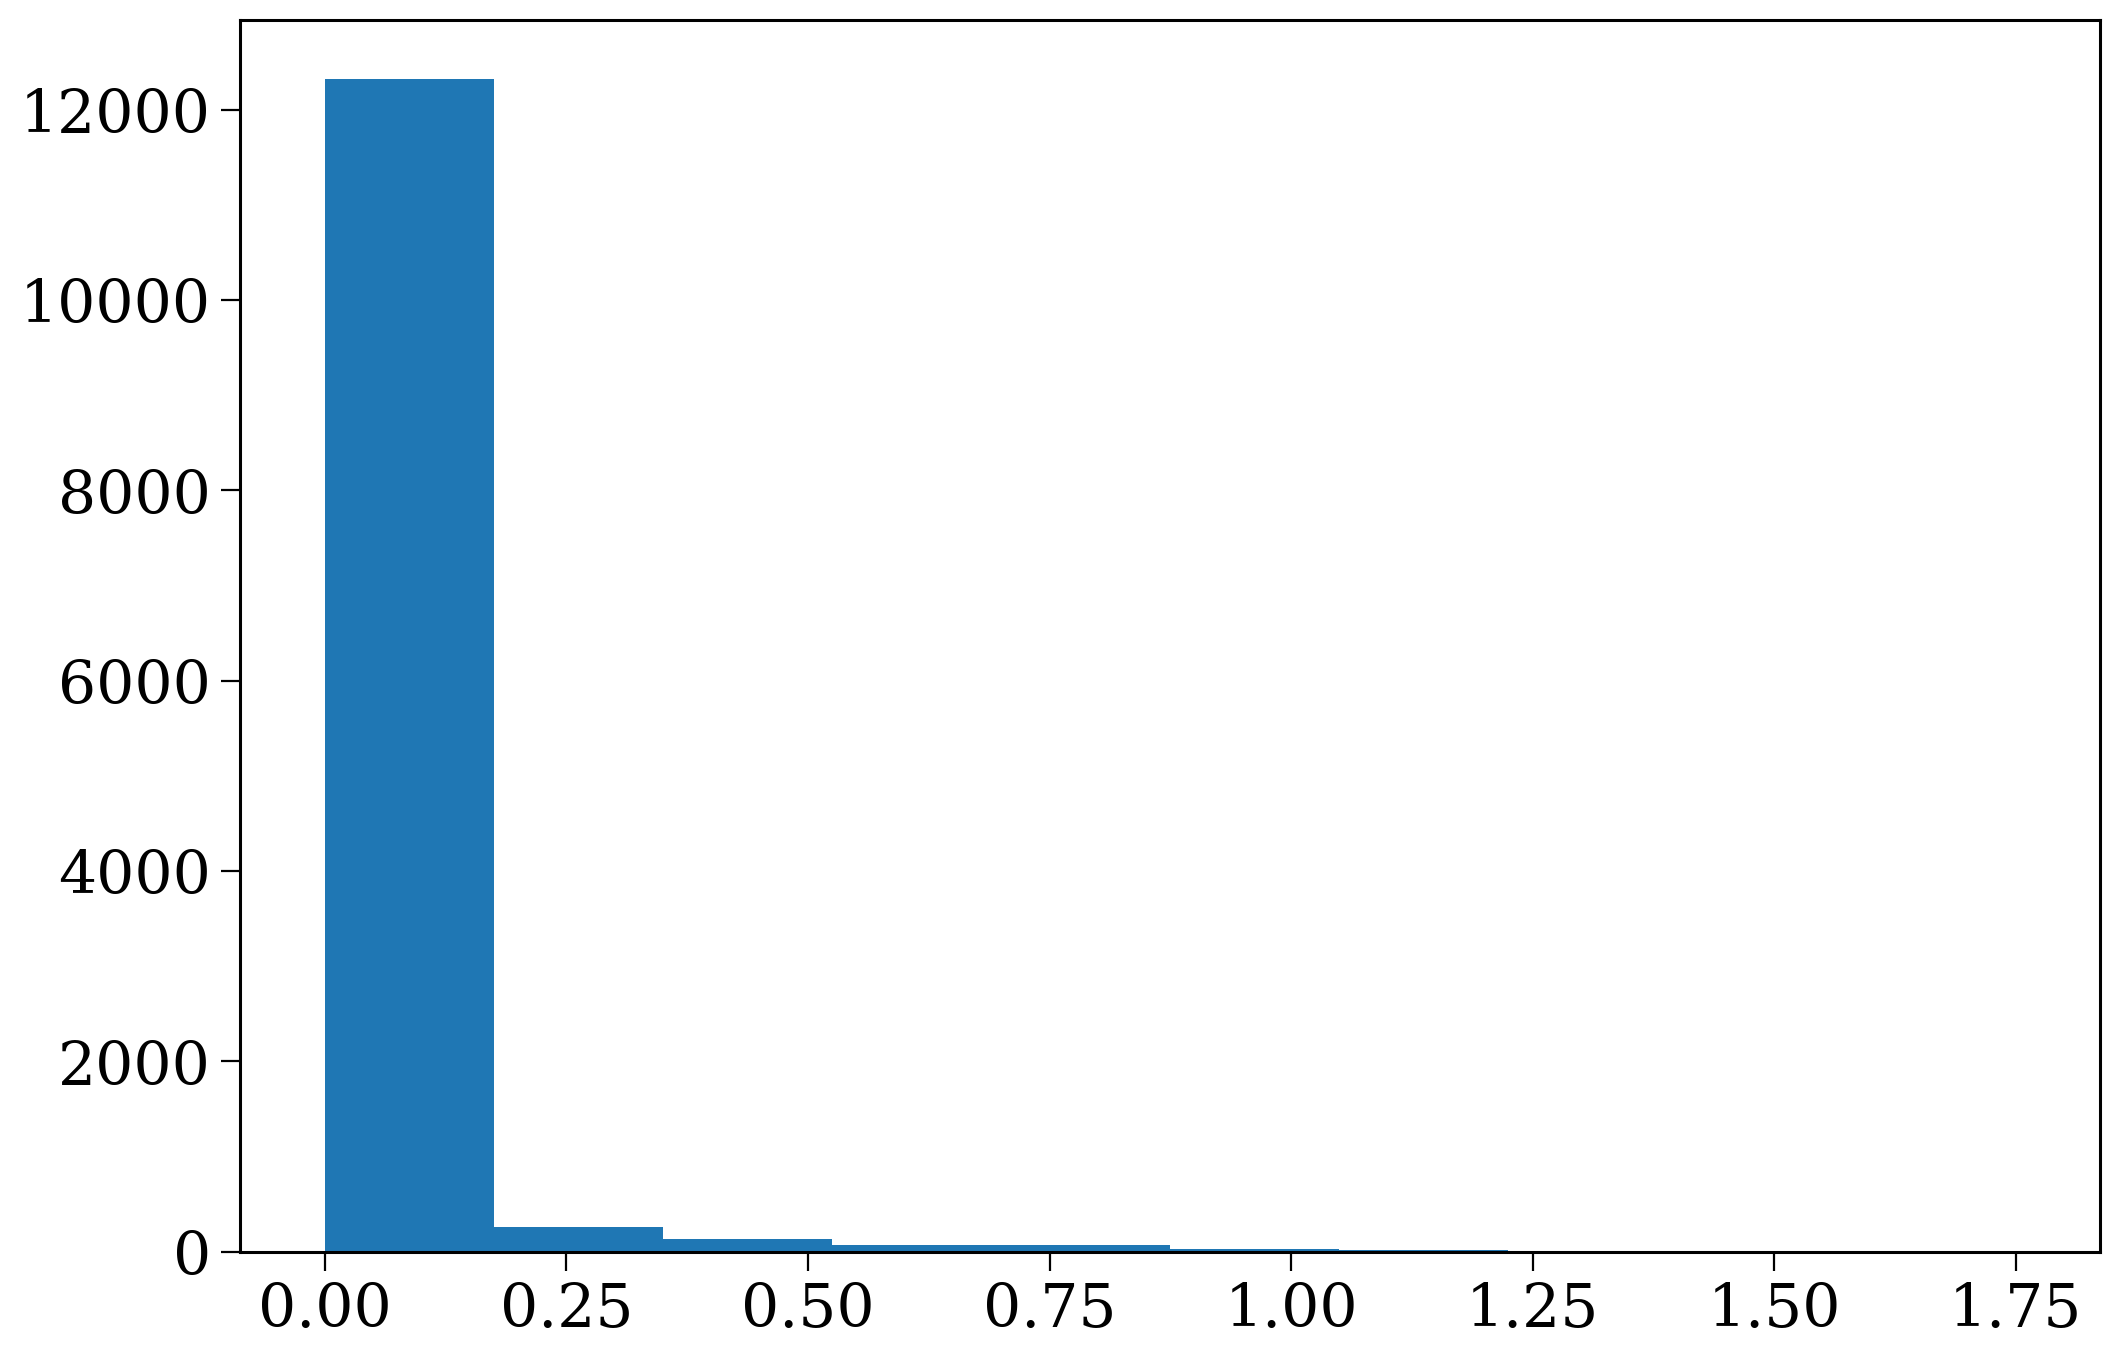

In [17]:
plt.hist(get_relative_mass_gain(no_rlof))

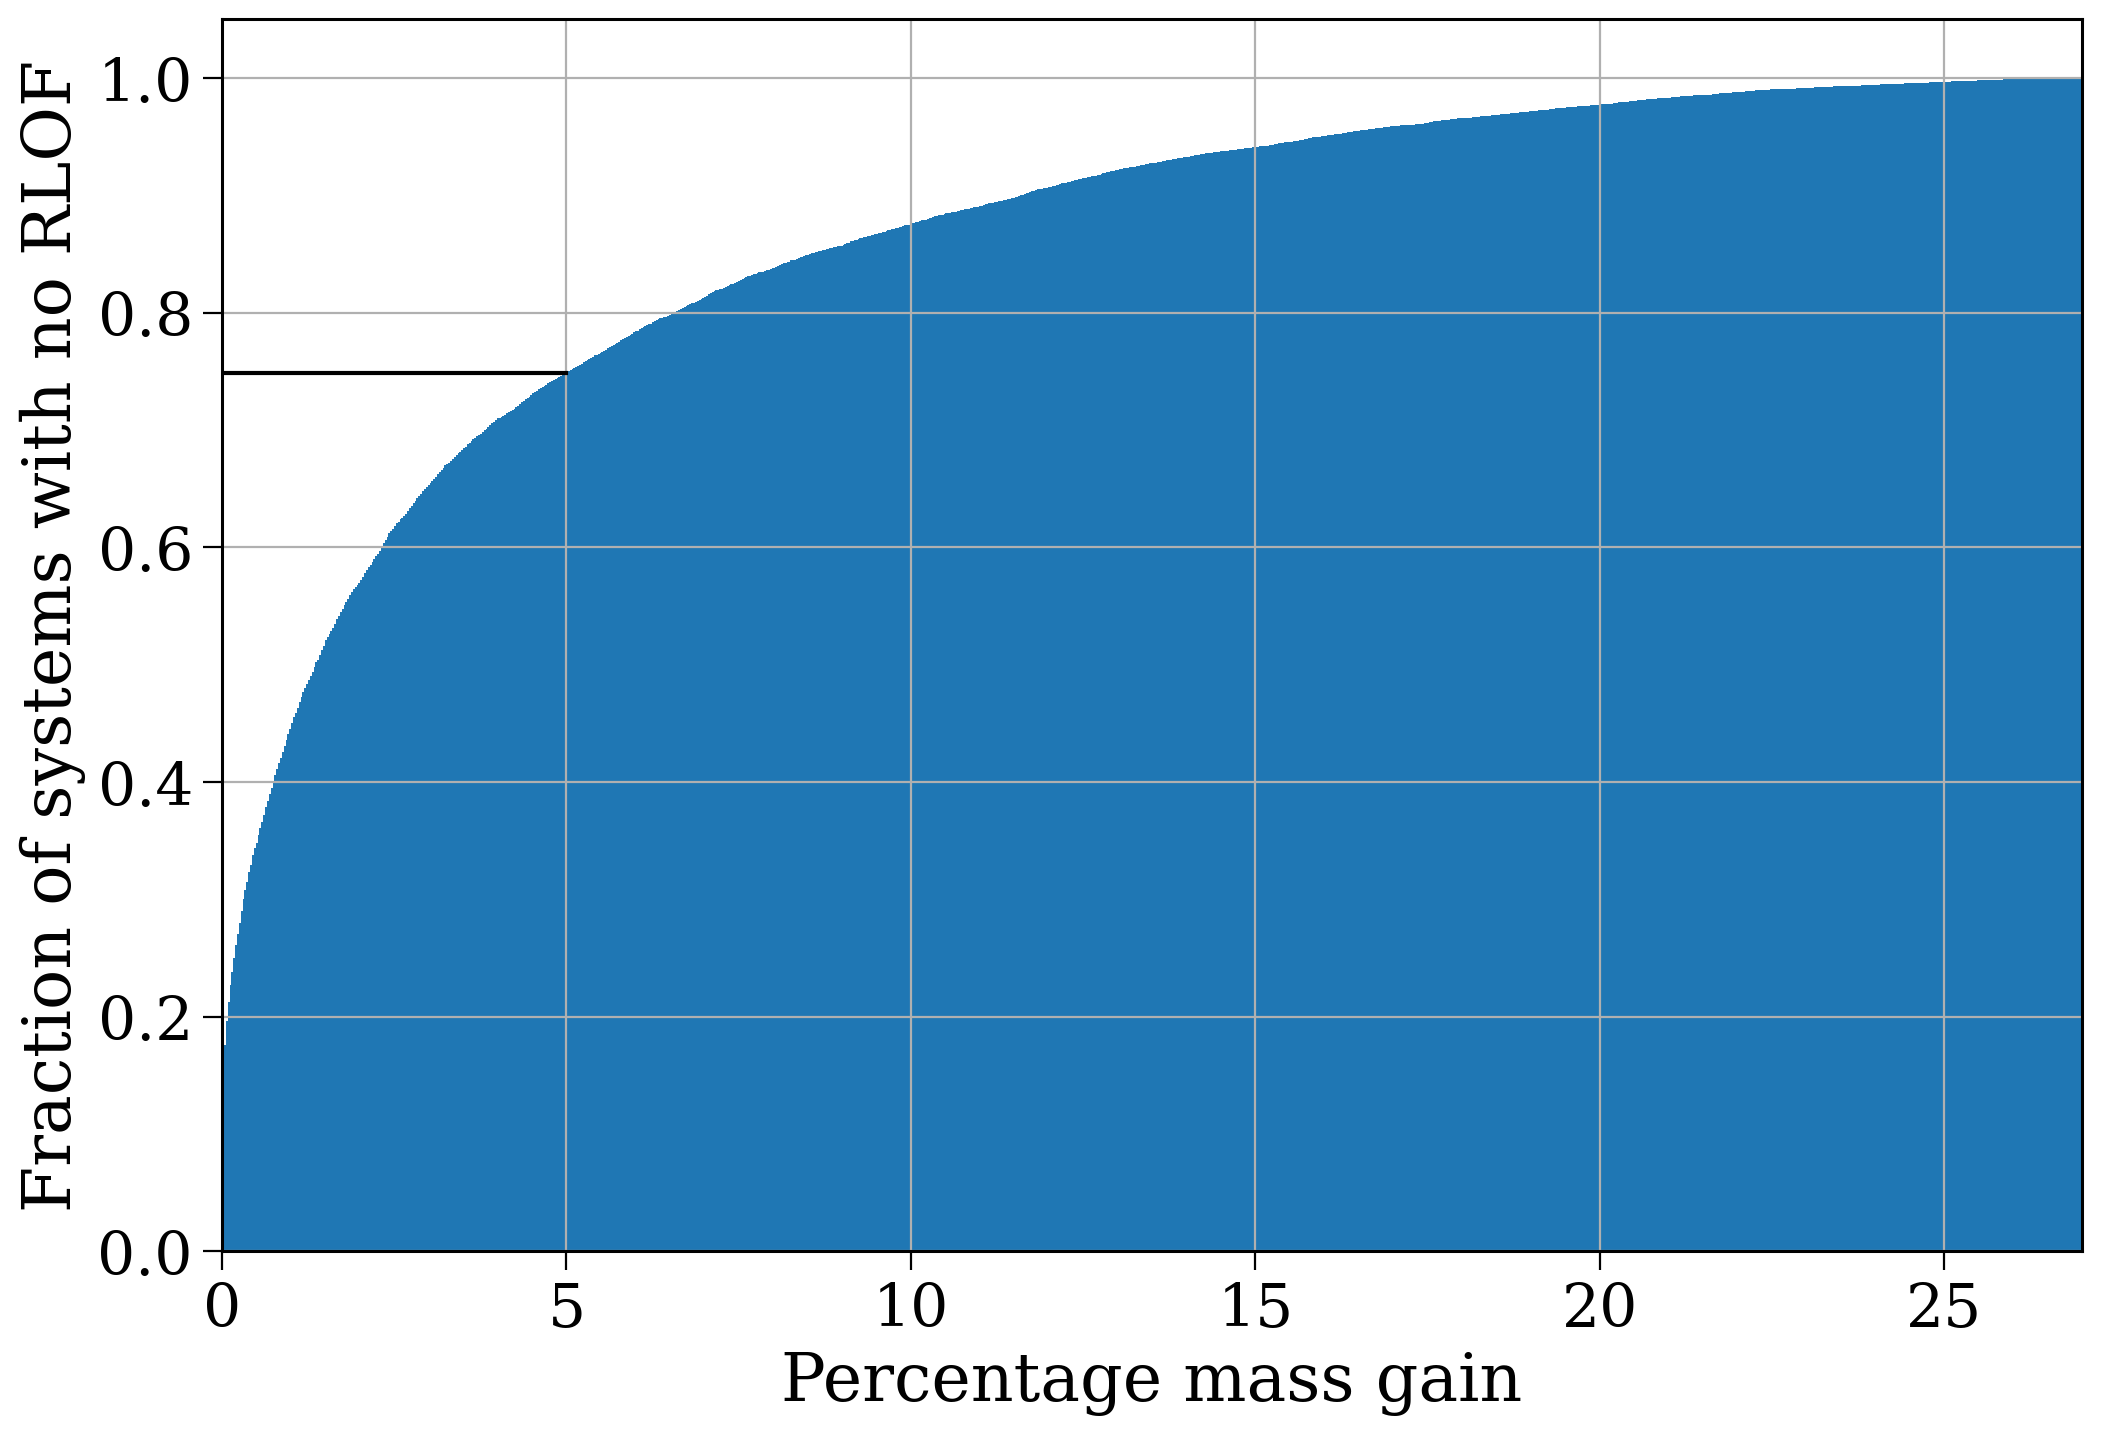

In [18]:
fig, ax = plt.subplots()

rmg = get_relative_mass_gain(no_rlof, "mass_2")
ax.hist(rmg, bins=1000, cumulative=True, density=True)
ax.plot([0, 5], [1 - len(rmg[rmg > 5]) / len(rmg), 1 - len(rmg[rmg > 5]) / len(rmg)], color="black")

ax.set(xlabel="Percentage mass gain", ylabel="Fraction of systems with no RLOF", xlim=(0, 27))

ax.grid()

plt.show()

In [19]:
def non_interacting_fraction(p):
    rlof_nums = p.bpp[(p.bpp["evol_type"] >= 3) & (p.bpp["evol_type"] <= 8)]["bin_num"].unique()
    interaction_nums = np.concatenate((rlof_nums, p.bpp["bin_num"][(p.bpp.groupby("bin_num")["mass_1"].diff().fillna(0.0) > 0.0)
                                                                   | (p.bpp.groupby("bin_num")["mass_2"].diff().fillna(0.0) > 0.0)].unique()))
    return 1 - len(np.unique(rlof_nums)) / len(p)

In [20]:
non_interacting_fraction(p)

0.17027774121363692